Exercises from [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap01)

This notebook uses the `ThinkJulia` module from [ThinkJulia Repo](https://github.com/BenLauwens/ThinkJulia.jl)

In [ ]:
using Pkg: PackageSpec
Pkg.add(PackageSpec(url="https://github.com/BenLauwens/ThinkJulia.jl", rev="master"))

In [99]:
#initializer
using Revise, Base.Filesystem
cd(joinpath(pwd(),"../data"))
Pkg.activate("LearnJulia")

using Distributed, Plots, Printf, ThinkJulia, Random
@everywhere using SharedArrays
@everywhere using Base.Iterators

println("Threads: ",Threads.nthreads())
println("Procs: $(nprocs()), Workers: $(nworkers())")
println("Working Directory: $(pwd())")

Threads: 8
Procs: 9, Workers: 8
Working Directory: /home/alk/Documents/Git/Julia/LearnJulia/data


┌ Info: activating new environment at ~/Documents/Git/Julia/LearnJulia/data/LearnJulia.
└ @ Pkg.API /build/julia/src/julia-1.0.3/usr/share/julia/stdlib/v1.0/Pkg/src/API.jl:600


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-One-:-Basics-of-a-Program" data-toc-modified-id="Chapter-One-:-Basics-of-a-Program-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter One : Basics of a Program</a></span></li><li><span><a href="#Chapter-Two-:-Variables,-Expressions-and-Statements" data-toc-modified-id="Chapter-Two-:-Variables,-Expressions-and-Statements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chapter Two : Variables, Expressions and Statements</a></span></li><li><span><a href="#Chapter-Three-:-Functions" data-toc-modified-id="Chapter-Three-:-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Chapter Three : Functions</a></span></li><li><span><a href="#Chapter-Four-:-Case-Study-on-Interface-Design" data-toc-modified-id="Chapter-Four-:-Case-Study-on-Interface-Design-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Chapter Four : Case Study on Interface Design</a></span></li><li><span><a href="#Chapter-Five-:-Conditionals-and-Recursion" data-toc-modified-id="Chapter-Five-:-Conditionals-and-Recursion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Chapter Five : Conditionals and Recursion</a></span></li><li><span><a href="#Chapter-Six-:-Fruitful-aka-Pure-Functions" data-toc-modified-id="Chapter-Six-:-Fruitful-aka-Pure-Functions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Chapter Six : Fruitful aka <em>Pure</em> Functions</a></span></li><li><span><a href="#Chapter-Seven-:-Iteration" data-toc-modified-id="Chapter-Seven-:-Iteration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Chapter Seven : Iteration</a></span></li><li><span><a href="#Chapter-Eight-:-Strings" data-toc-modified-id="Chapter-Eight-:-Strings-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Chapter Eight : Strings</a></span></li><li><span><a href="#Chapter-Nine-:-Case-Study-on-Word-Play" data-toc-modified-id="Chapter-Nine-:-Case-Study-on-Word-Play-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Chapter Nine : Case Study on Word Play</a></span></li><li><span><a href="#Chapter-Ten-:-Arrays" data-toc-modified-id="Chapter-Ten-:-Arrays-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Chapter Ten : Arrays</a></span></li><li><span><a href="#Chapter-Eleven-:-Dictionaries" data-toc-modified-id="Chapter-Eleven-:-Dictionaries-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Chapter Eleven : Dictionaries</a></span></li><li><span><a href="#Chapter-Twelve-:-Tuples" data-toc-modified-id="Chapter-Twelve-:-Tuples-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Chapter Twelve : Tuples</a></span></li><li><span><a href="#Chapter-Thirteen-:-Case-Study-on-Data-Structure-Selection" data-toc-modified-id="Chapter-Thirteen-:-Case-Study-on-Data-Structure-Selection-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Chapter Thirteen : Case Study on Data Structure Selection</a></span></li><li><span><a href="#Chapter-Fourteen-:-Files" data-toc-modified-id="Chapter-Fourteen-:-Files-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Chapter Fourteen : Files</a></span></li><li><span><a href="#Chapter-Fifteen-:-Structs-and-Objects" data-toc-modified-id="Chapter-Fifteen-:-Structs-and-Objects-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Chapter Fifteen : Structs and Objects</a></span></li><li><span><a href="#Chapter-Sixteen-:-Structs-and-Functions" data-toc-modified-id="Chapter-Sixteen-:-Structs-and-Functions-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Chapter Sixteen : Structs and Functions</a></span></li><li><span><a href="#Chapter-Seventeen-:-Multiple-Dispatch" data-toc-modified-id="Chapter-Seventeen-:-Multiple-Dispatch-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Chapter Seventeen : Multiple Dispatch</a></span></li><li><span><a href="#Chapter-Eighteen-:-SubTyping" data-toc-modified-id="Chapter-Eighteen-:-SubTyping-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Chapter Eighteen : SubTyping</a></span></li><li><span><a href="#Extras:-Chapter-Nineteen-:-Syntax-Specials" data-toc-modified-id="Extras:-Chapter-Nineteen-:-Syntax-Specials-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Extras: Chapter Nineteen : Syntax Specials</a></span></li><li><span><a href="#Extras:-Chapter-Twenty-:-Base-and-Standard-Library" data-toc-modified-id="Extras:-Chapter-Twenty-:-Base-and-Standard-Library-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Extras: Chapter Twenty : Base and Standard Library</a></span></li></ul></div>

## Chapter One : Basics of a Program

* In a print statement, what happens if you leave out one of the parentheses, or both?

* If you are trying to print a string, what happens if you leave out one of the quotation marks, or both?

* You can use a minus sign to make a negative number like -2. What happens if you put a plus sign before a number? What about 2++2?

* In math notation, leading zeros are ok, as in 02. What happens if you try this in Julia?

* What happens if you have two values with no operator between them?



In [7]:
print(

LoadError: syntax: incomplete: premature end of input

In [8]:
print(")

LoadError: syntax: incomplete: invalid string syntax

In [9]:
2++2

UndefVarError: UndefVarError: ++ not defined

In [10]:
+2

2

In [11]:
02

2

In [12]:
2 2

LoadError: syntax: extra token "2" after end of expression

* How many seconds are there in 42 minutes 42 seconds?

In [13]:
42*60 + 42

2562

* How many miles are there in 10 kilometers?

In [14]:
10*1.61

16.1

* If you run a 10 kilometer race in 37 minutes 48 seconds, what is your average pace (time per mile in minutes and seconds)? What is your average speed in miles per hour?

In [15]:
(10000 / (37*60+48))*3.6/1.61

9.859016070196196

In [16]:
ans*1.61*(37*60+48)/3600

10.000000000000002

## Chapter Two : Variables, Expressions and Statements

* To check your understanding, type the following statements in the Julia REPL and see what they do:

In [17]:
5

5

In [18]:
x = 5

5

In [19]:
x+1

6

* We’ve seen that n = 42 is legal. What about 42 = n?

* How about x = y = 1?

* In some languages every statement ends with a semi-colon, ;. What happens if you put a semi-colon at the end of a Julia statement?

* What if you put a period at the end of a statement?

* In math notation you can multiply x and y like this: x y. What happens if you try that in Julia?

In [20]:
42 = n

ErrorException: syntax: invalid assignment location "42"

In [21]:
x = y = 1
x, y

(1, 1)

In [22]:
x = 1 ;

In [23]:
x = y .

LoadError: syntax: space before "." not allowed in "y ."

In [24]:
5x, 5y

(5, 5)

In [25]:
x y

LoadError: syntax: extra token "y" after end of expression

* The volume of a sphere with radius r is $\frac{4}{3} \pi r^3$. What is the volume of a sphere with radius 5?

* Suppose the cover price of a book is `$24.95`, but bookstores get a `40%` discount. Shipping costs are `$3` for the first copy and `75 cents` for each additional copy. What is the total wholesale cost for `60` copies?

* If I leave my house at `6:52 am` and run 1 mile at an easy pace `(8:15 per mile)`, then `3 miles` at tempo `(7:12 per mile)` and `1 mile` at easy pace again, what time do I get home for breakfast?


In [26]:
vol(x::Real) = (4/3)pi*x^3
vol(5)

523.5987755982989

In [27]:
bookprice(n::Real) = 24.95*0.6 + 3.0*1 + (n-1)*0.75
bookprice(60)

62.22

In [28]:
speed_miles(min::Int, sec::Int)::Float32 = 3600 / (min*60 + sec)
time_sec(miles::Real, min::Int, sec::Int)::Float32 = miles / speed_miles(min, sec)*3600
time_mins(seconds::Real)::Tuple{Int, Int} = divrem(seconds,60)

time_mins (generic function with 1 method)

In [29]:
time_mins(2* time_sec(1, 8, 15) + time_sec(3, 7, 12))
# 7:00:06

(38, 6)

## Chapter Three : Functions

```julia
function printlyrics()
    println("I'm a lumberjack, and I'm okay.")
    println("I sleep all night and I work all day.")
end

function repeatlyrics()
    printlyrics()
    printlyrics()
end

repeatlyrics()
```

* Move the last line of this program to the top, so the function call appears before the definitions. Run the program and see what error message you get.

    * Now move the function call back to the bottom and move the definition of `printlyrics` after the definition of `repeatlyrics`. What happens when you run this program?


In [30]:
repeatlyrics()

function printlyrics()
    println("I'm a lumberjack, and I'm okay.")
    println("I sleep all night and I work all day.")
end

function repeatlyrics()
    printlyrics()
    printlyrics()
end

UndefVarError: UndefVarError: repeatlyrics not defined

In [31]:
function repeatlyrics()
    printlyrics()
    printlyrics()
end

function printlyrics()
    println("I'm a lumberjack, and I'm okay.")
    println("I sleep all night and I work all day.")
end

repeatlyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.
I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


* Write a function named `rightjustify` that takes a string named `s` as a parameter and prints the string with enough leading spaces so that the last letter of the string is in column `70` of the display. 

In [32]:
function rightjustify(s::String)::String
    moveby = 70 - length(s)
    return repeat(" ", moveby) * s
end

rightjustify (generic function with 1 method)

In [33]:
rightjustify("monty")

"                                                                 monty"

A function object is a value you can assign to a variable or pass as an argument. For example, `dotwice` is a function that takes a function object as an argument and calls it twice:



* Type this example into a script and test it.

* Modify `dotwice` so that it takes two arguments, a function object and a value, and calls the function twice, passing the value as an argument.

* Copy the definition of `printtwice` from earlier in this chapter to your script.

* Use the modified version of `dotwice` to call `printtwice` twice, passing "spam" as an argument.

* Define a new function called `dofour` that takes a function object and a value and calls the function four times, passing the value as a parameter. There should be only two statements in the body of this function, not four.



In [34]:
function dotwice(f)
    f()
    f()
end

function printspam()
    println("spam")
end

printspam (generic function with 1 method)

In [35]:
dotwice(printspam)

spam
spam


In [36]:
function dotwice(f, arg)
    f(arg)
    f(arg)
end

function printspam(s::String)
    println(s)
end

printspam (generic function with 2 methods)

In [37]:
dotwice(printspam, "spam")

spam
spam


In [38]:
function printtwice(bruce)
    println(bruce)
    println(bruce)
end

printtwice (generic function with 1 method)

In [39]:
dotwice(printtwice, "spam")

spam
spam
spam
spam


In [40]:
function dofour(f, arg)
    dotwice(f, arg)
    dotwice(f, arg)
end

dofour(printtwice, "spam")

spam
spam
spam
spam
spam
spam
spam
spam


* Write a function printgrid that draws a grid like the following:
```bash
    julia> printgrid()
        + - - - - + - - - - +
        |         |         |
        |         |         |
        |         |         |
        |         |         |
        + - - - - + - - - - +
        |         |         |
        |         |         |
        |         |         |
        |         |         |
        + - - - - + - - - - +
```

In [41]:
function printgrid(r::Int, c::Int)
    iir = repeat("+ - - - - ", r)*"+\n"
    iic = repeat(repeat("|         ", c)*"|\n", 4)
    for ir in 1:r
        print(iir)
        print(iic)
    end
    print(iir)
end
        
printgrid(2, 2)

+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +


* Write a function that draws a similar grid with four rows and four columns.

In [42]:
printgrid(4, 4)

+ - - - - + - - - - + - - - - + - - - - +
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
+ - - - - + - - - - + - - - - + - - - - +
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
+ - - - - + - - - - + - - - - + - - - - +
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
+ - - - - + - - - - + - - - - + - - - - +
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
|         |         |         |         |
+ - - - - + - - - - + - - - - + - - - - +


## Chapter Four : Case Study on Interface Design


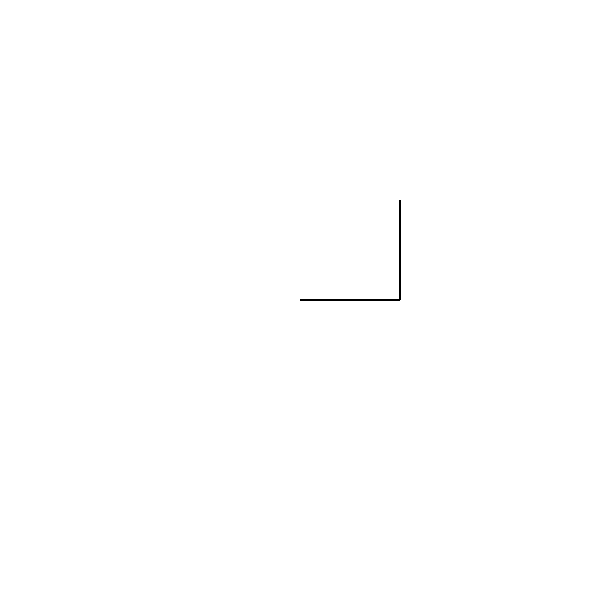

In [43]:
🐢 = Turtle()
@svg begin
    forward(🐢, 100)
    turn(🐢, -90)
    forward(🐢, 100)
end

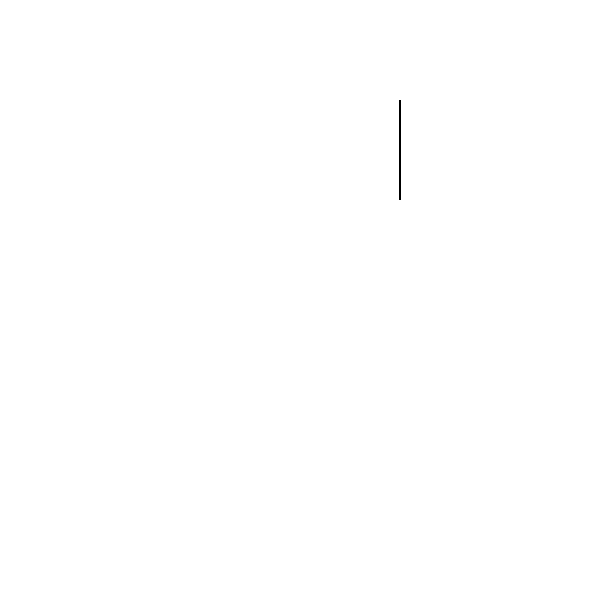

In [44]:
@svg begin
    forward(🐢, 100)
end

Now modify the macro to draw a square. Don’t go on until you’ve got it working!

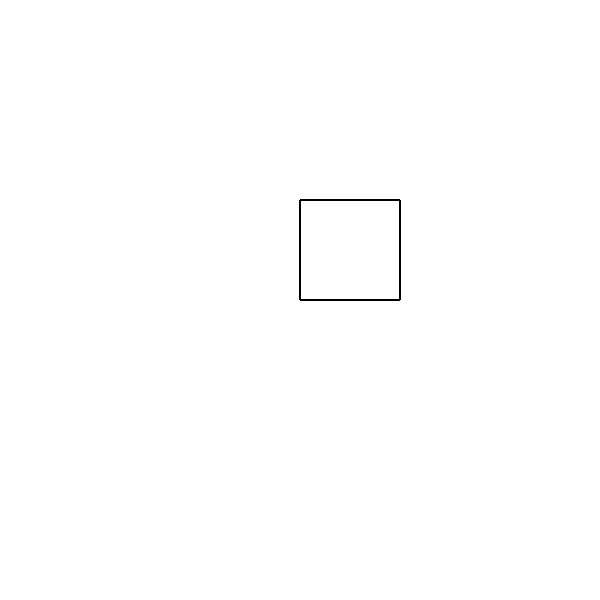

In [45]:
function drawsquare()
    🐢 = Turtle()
    # pure function, doesn't alter the state of 🐢
    @svg begin
        for i in 1:4
            forward(🐢, 100)
            turn(🐢, -90)
        end
    end
end

drawsquare()

Write a function called square that takes a parameter named `t`, which is a `turtle`. It should use the turtle to draw a square.

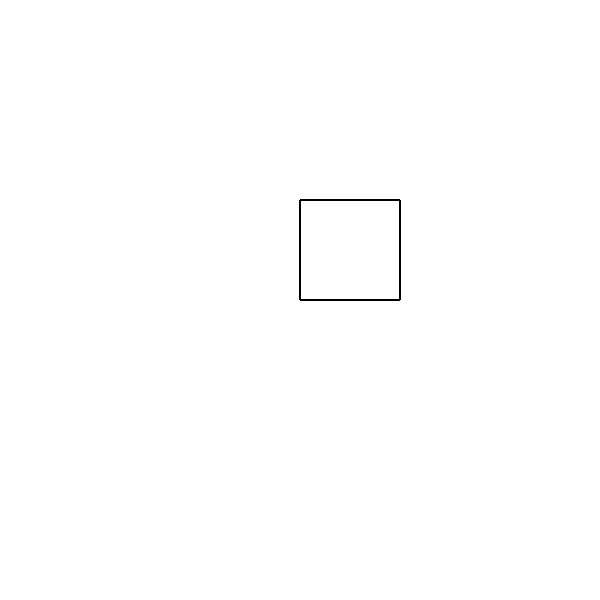

In [46]:
function square(t::Turtle)
    # pure function, doesn't alter the state of t
    @svg begin
        for i in 1:4
            forward(t, 100)
            turn(t, -90)
        end
    end
end

🐢 = Turtle()
square(🐢)

Write a function call that passes `t` as an argument to `square`, and then run the macro again.

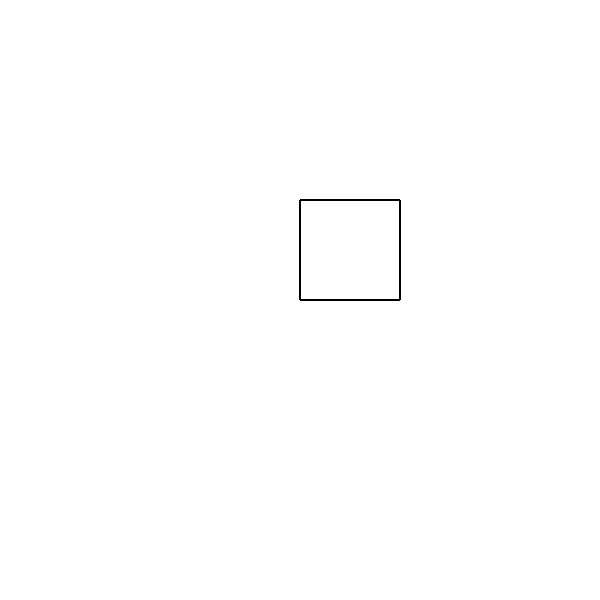

In [47]:
function call_square(t::Turtle)
    square(t)
end

🐢 = Turtle()
call_square(🐢)

Add another parameter, named `len`, to `square`. Modify the body so length of the sides is `len`, and then modify the function call to provide a second argument. Run the macro again. Test with a range of values for `len`.

In [48]:
function square(t::Turtle, len::Int)
    # pure function, doesn't alter the state of t
    @svg begin
        for i in 1:4
            forward(t, len)
            turn(t, -90)
        end
    end
end

square (generic function with 2 methods)

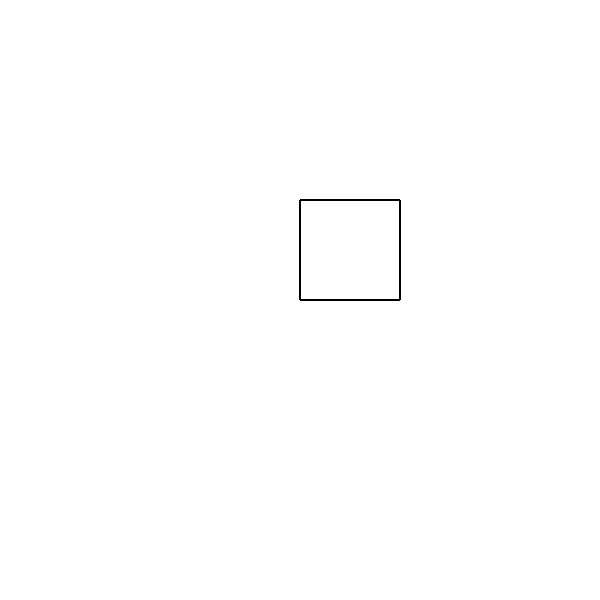

In [49]:
🐢 = Turtle()
square(🐢, 100)

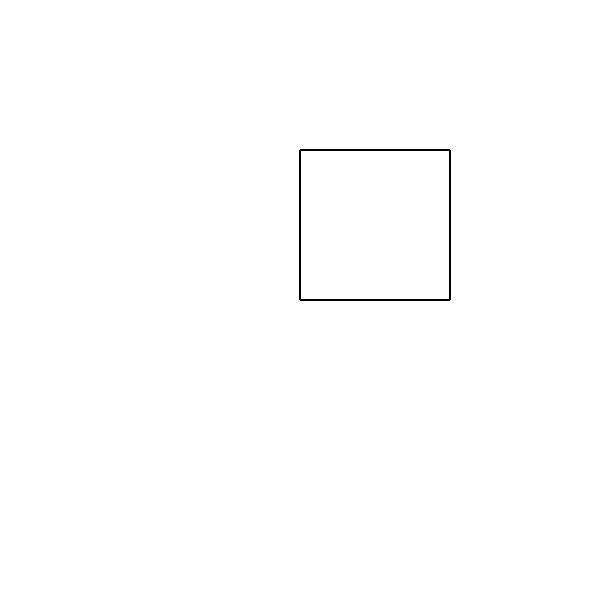

In [50]:
square(🐢, 150)

Make a copy of `square` and change the name to `polygon`. Add another parameter named `n` and modify the body so it draws an n-sided regular polygon.

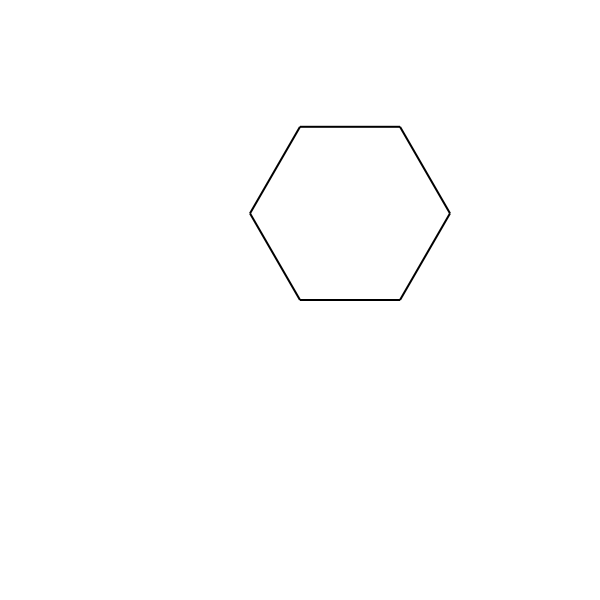

In [51]:
function npolygon(t::Turtle, n::Int, len::Real)
    # pure function, doesn't alter the state of t
    @svg begin
        for i in 1:n
            forward(t, len)
            turn(t, -360/n)
        end
    end
end

🐢 = Turtle()
npolygon(🐢, 6, 100)

Write a function called `circle` that takes a turtle, `t`, and radius, `r`, as parameters and that draws an approximate circle by calling polygon with an appropriate length and number of sides. Test your function with a range of values of `r`.

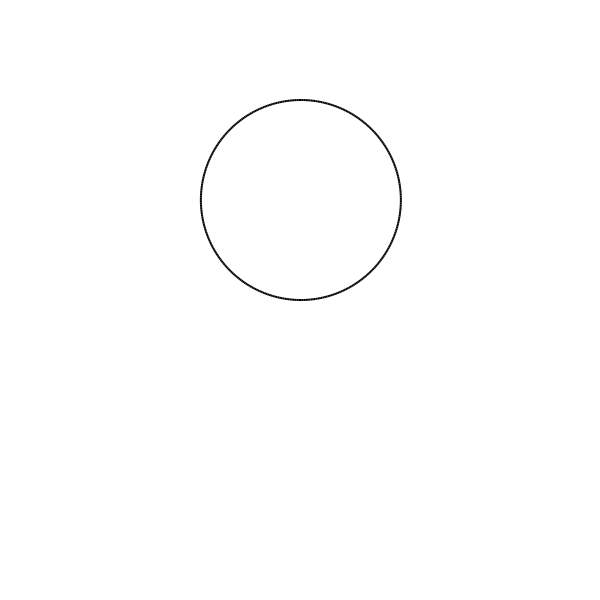

In [52]:
function ncircle(t::Turtle, rad::Real)
    # pure function, doesn't alter the state of t
    @svg begin
        for i in 1:360
            forward(t, 2pi*rad/360)
            turn(t, -1)
        end
    end
end

🐢 = Turtle()
ncircle(🐢, 100)

Make a more general version of `circle` called `arc` that takes an additional parameter `angle`, which determines what fraction of a circle to draw. `angle` is in units of degrees, so when angle = 360, `arc` should draw a complete `circle`.

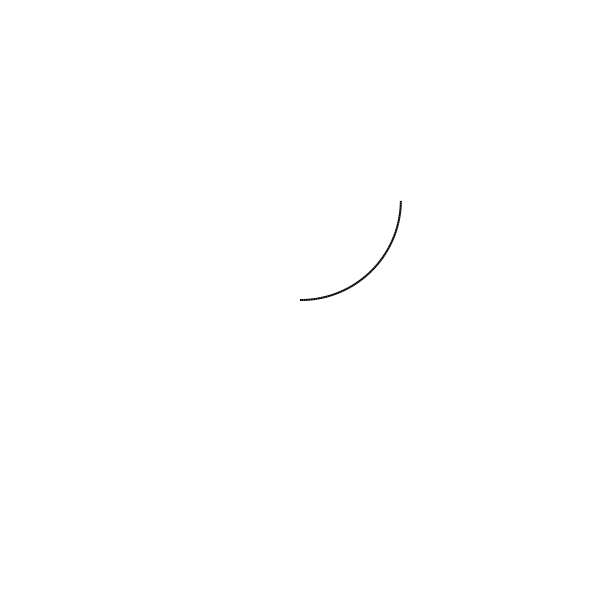

In [53]:
function ncircle(t::Turtle, rad::Real, angle::Real)
    # pure function, doesn't alter the state of t
    @svg begin
        for i in 1:angle
            forward(t, 2pi*rad/360)
            turn(t, -1)
        end
    end
end

🐢 = Turtle()
ncircle(🐢, 100, 90)

Draw a stack diagram that shows the state of the program while executing `circle(🐢, radius)`. You can do the arithmetic by hand or add print statements to the code.

In [54]:
function sncircle(t::Turtle, rad::Real)
    println("T:", summary(t)," :Type:",typeof(t)," :REPR:",repr(t))
    # pure function, doesn't alter the state of t
    for i in 1:360
        forward(t, 2pi*rad/360)
        println("REPR:\t",repr(t))
        turn(t, -1)
        println("REPR:\t",repr(t))
    end
end

🐢 = Turtle()
sncircle(🐢, 100)

T:Turtle :Type:Turtle :REPR:Turtle(0.0, 0.0, true, 0.0, (0.0, 0.0, 0.0))
REPR:	Turtle(1.7453292519943295, 0.0, true, 0.0, (0.0, 0.0, 0.0))
REPR:	Turtle(1.7453292519943295, 0.0, true, 6.265732014659643, (0.0, 0.0, 0.0))
REPR:	Turtle(3.4903926818898885, -0.030460195472685136, true, 6.265732014659643, (0.0, 0.0, 0.0))
REPR:	Turtle(3.4903926818898885, -0.030460195472685136, true, 6.2482787221397, (0.0, 0.0, 0.0))
REPR:	Turtle(5.234658726461121, -0.09137130794743947, true, 6.2482787221397, (0.0, 0.0, 0.0))
REPR:	Turtle(5.234658726461121, -0.09137130794743947, true, 6.230825429619757, (0.0, 0.0, 0.0))
REPR:	Turtle(6.977596065373767, -0.182714783309344, true, 6.230825429619757, (0.0, 0.0, 0.0))
REPR:	Turtle(6.977596065373767, -0.182714783309344, true, 6.213372137099814, (0.0, 0.0, 0.0))
REPR:	Turtle(8.71867378303018, -0.30446279745093935, true, 6.213372137099814, (0.0, 0.0, 0.0))
REPR:	Turtle(8.71867378303018, -0.30446279745093935, true, 6.195918844579871, (0.0, 0.0, 0.0))
REPR:	Turtle(10.457

limit_output extension: Maximum message size of 10000 exceeded with 10270 characters

Write an appropriately general set of functions that can draw flowers as in Turtle flowers.
![Turtle flowers](https://benlauwens.github.io/ThinkJulia.jl/latest/images/fig42.svg)

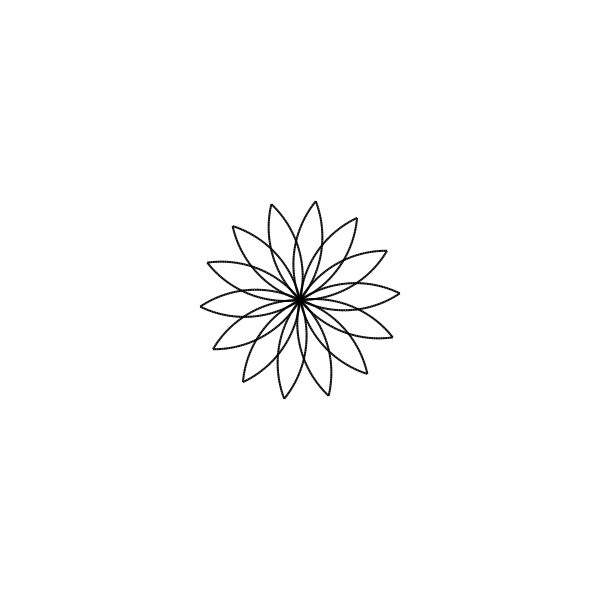

In [55]:
function petal(t::Turtle, rad::Real)
    heading = t.orientation
    petal_ang::Int16 = 60
    for i in 1:petal_ang
        forward(t, 2pi*rad/360)
        turn(t, -1)
    end
    turn(t, -petal_ang*2)
    for i in 1:petal_ang
        forward(t, 2pi*rad/360)
        turn(t, -1)
    end
    t.orientation = heading
    return t
end

function flower(t::Turtle, rad::Real, petals::Int)
    # pure function, doesn't alter the state of t
    @svg begin
        for i in 1:petals
            t = petal(t, rad)
            turn(t, -360/petals)
        end
    end
end

🐢 = Turtle()
flower(🐢, 100.0, 14)

Write an appropriately general set of functions that can draw shapes as in Turtle pies.
![Turtle pies](https://benlauwens.github.io/ThinkJulia.jl/latest/images/fig43.svg)

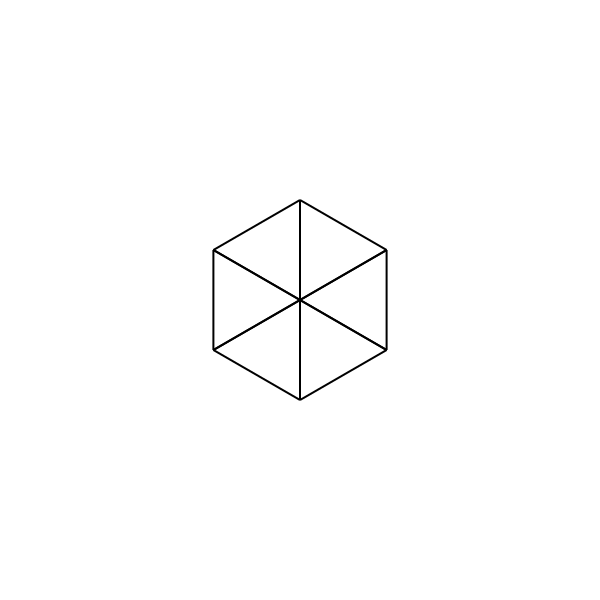

In [56]:
function tpie(t::Turtle, radius::Real, angle::Real)
    
    y = radius * sin(angle * pi/180)
    
    turn(t, angle)
    forward(t, radius)
    turn(t, -90-angle)
    forward(t, 2*y)
    turn(t, -90-angle)
    forward(t, radius)
    turn(t, -180+angle)
end

function tpies(t::Turtle, radius::Real, pies::Int)
    # pure function, doesn't alter the state of t
    xsect = 360 / pies
    @svg begin
        for i = 1:pies
            tpie(t, radius, xsect/2)
            turn(t, -xsect)
        end
    end
end

🐢 = Turtle()
tpies(🐢, 100.0, 6)

Read about spirals at https://en.wikipedia.org/wiki/Spiral; then write a program that draws an Archimedian spiral as in Archimedian spiral.

![Archimedian spiral](https://benlauwens.github.io/ThinkJulia.jl/latest/images/fig44.svg)

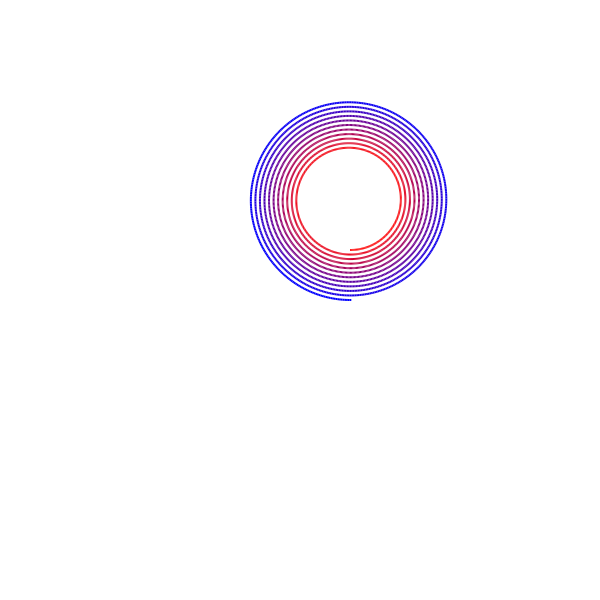

(0.0007477272727941246, 0.0, 0.999252272727206)

In [57]:
function archimedes(t::Turtle, start::T, end_::T, turns::T) where T <: Real 
    # pure function, doesn't alter the state of t
    stepcolor(c, delta) = c + [-delta, 0, delta]
    color = [1.0, 0.0, 0.0]
    t.pencolor = tuple(color...)
    t.xpos, t.ypos = start, -start
    stepping = (end_-start)/(360*turns)
    @svg begin
        for i = range(start, step=stepping, stop=end_)
            forward(t, 2*pi*i/360)
            color = stepcolor(color, 0.999/(360*turns))
            t.pencolor = tuple(color...)
            turn(t, -1)
        end
    end
print(t.pencolor)
end

🐢 = Turtle()
archimedes(🐢, 50.0, 100.0, 11.0)

## Chapter Five : Conditionals and Recursion

```julia
function printn(s, n)
    if n ≤ 0
        return
    end
    println(s)
    printn(s, n-1)
end
```
As an exercise, draw a stack diagram for `printn` called with `s = "Hello"` and `n = 2`. Then write a function called `do_n` that takes a function object and a number, `n`, as arguments, and that calls the given function `n` times.

In [58]:
function printn(s::String, n::Int)
    if n ≤ 0
        return
    end
    println("\t", s, "\tn:", string(n))
    printn(s, n-1)
end

function do_n(obj, n::Int64)
    for i=1:n
        println("do_n: n=",string(i),"\t")
        repr(obj("Hello", i))
    end
end

do_n(printn, 4)

do_n: n=1	
	Hello	n:1
do_n: n=2	
	Hello	n:2
	Hello	n:1
do_n: n=3	
	Hello	n:3
	Hello	n:2
	Hello	n:1
do_n: n=4	
	Hello	n:4
	Hello	n:3
	Hello	n:2
	Hello	n:1


The function time returns the current Greenwich Mean Time in “the epoch”, which is an arbitrary time used as a reference point. On `UNIX` systems, the epoch is `1 January 1970`.
```julia
julia> time()
1.542362033923874e9
```
Write a script that reads the current time and converts it to a time of day in hours, minutes, and seconds, plus the number of days since the epoch.

In [59]:
function parsetime(time::Float64)
    days, rem = divrem(time, 24*3600)
    hours, rem = divrem(rem, 3600)
    minutes, rem = divrem(rem, 60)
    seconds = rem
    println("Time of Day since Epoch: (1 January 1970)")
    println("Days:",Int(days),
            " Hours:",Int(hours),
            " Minutes:",Int(minutes),
            " Seconds:",seconds)
end
parsetime(time())

Time of Day since Epoch: (1 January 1970)
Days:17946 Hours:16 Minutes:42 Seconds:4.174201011657715


Fermat’s Last Theorem says that there are no positive integers $a$, $b$, and $c$

such that
$a^n+b^n=c^n$

for any values of $n$ greater than $2$.

* Write a function named `checkfermat` that takes four parameters— `a`, `b`, `c` and `n`—and checks to see if Fermat’s theorem holds. If `n` is greater than `2` and `a^n + b^n == c^n` the program should print, `“Holy smokes, Fermat was wrong!”` Otherwise the program should print, `“No, that doesn’t work.”`

* Write a function that prompts the user to input values for `a`, `b`, `c` and `n`, converts them to integers, and uses `checkfermat` to check whether they violate Fermat’s theorem.



In [60]:
function checkfermat(a::T, b::T, c::T, n::T) where {T <: Union{Int64, BigInt}}
    if a > 0 && b > 0 && c > 0 && n > 2
        if a^n + b^n == c^n
            print("Holy smokes, Fermat was wrong!")
        else
            print("No, that doesn’t work.")
        end
    else
        print("a, b and c all must be positive integers, and n must be greater than 2 (!)")
    end
end

checkfermat (generic function with 1 method)

In [61]:
function parsefermat()
    print("enter a"); a = parse(Int64, readline())
    print("enter b"); b = parse(Int64, readline())
    print("enter c"); c = parse(Int64, readline())
    print("enter n"); n = parse(Int64, readline())
    checkfermat(a, b, c, n)
end

parsefermat (generic function with 1 method)

In [63]:
parsefermat()

enter astdin> 9
enter bstdin> 8
enter cstdin> 9
enter nstdin> 3
No, that doesn’t work.

If you are given three sticks, you may or may not be able to arrange them in a triangle. For example, if one of the sticks is 12 inches long and the other two are one inch long, you will not be able to get the short sticks to meet in the middle. For any three lengths, there is a simple test to see if it is possible to form a triangle:

If any of the three lengths is greater than the sum of the other two, then you cannot form a triangle. Otherwise, you can. (If the sum of two lengths equals the third, they form what is called a “degenerate” triangle.)

* Write a function named `istriangle` that takes three integers as arguments, and that prints either `“Yes”` or `“No”`, depending on whether you can or cannot form a triangle from sticks with the given lengths.

* Write a function that prompts the user to input three stick lengths, converts them to integers, and uses `istriangle` to check whether sticks with the given lengths can form a triangle.



In [64]:
function istriangle(a::T, b::T, c::T ) where {T <: Real}
    if a+b < c || b+c < a || c+a < b
        print("NO")
    else
        print("YES")
    end
end
    
function parsetriangle()
    print("enter a"); a = parse(Float64, readline())
    print("enter b"); b = parse(Float64, readline())
    print("enter c"); c = parse(Float64, readline())
    istriangle(a, b, c)
end
        
parsetriangle()

enter astdin> 56
enter bstdin> 65
enter cstdin> 36
YES

What is the output of the following program? Draw a stack diagram that shows the state of the program when it prints the result.
```julia
function recurse(n, s)
    if n == 0
        println(s)
    else
        recurse(n-1, n+s)
    end
end

recurse(3, 0)
```

* What would happen if you called this function like this: recurse(-1, 0)?

* Write a docstring that explains everything someone would need to know in order to use this function (and nothing else).



In [65]:
function recurse(n::Int, s::Int)
    if n == 0
        println(s)
    else
        println("Rcursive: calling recurse with: ",string(n),", ",string(s))
        recurse(n-1, n+s)
    end
end

recurse(5, 5)

Rcursive: calling recurse with: 5, 5
Rcursive: calling recurse with: 4, 10
Rcursive: calling recurse with: 3, 14
Rcursive: calling recurse with: 2, 17
Rcursive: calling recurse with: 1, 19
20


* Read the following function and see if you can figure out what it does (see the examples in Case Study: Interface Design). Then run it and see if you got it right.
```julia
function draw(t, length, n)
    if n == 0
        return
    end
    angle = 50
    forward(t, length*n)
    turn(t, -angle)
    draw(t, length, n-1)
    furn(t, 2*angle)
    draw(t, length, n-1)
    turn(t, -angle)
    forward(-length*n)
end
```
![Koch Curve](https://benlauwens.github.io/ThinkJulia.jl/latest/images/fig52.svg)

The Koch curve is a fractal that looks something like A Koch curve. To draw a Koch curve with length $x$, all you have to do is

1. Draw a Koch curve with length $\frac{x}{3}$

2. Turn left $60$ degrees.

3. Draw a Koch curve with length $\frac{x}{3}$

4. Turn right $120$ degrees.

5. Draw a Koch curve with length $\frac{x}{3}$

6. Turn left $60$ degrees.

7. Draw a Koch curve with length $\frac{x}{3}$

The exception is if $x$ is less than 3: in that case, you can just draw a straight line with length $x$.

* Write a function called koch that takes a turtle and a length as parameters, and that uses the turtle to draw a Koch curve with the given length.

* Write a function called snowflake that draws three Koch curves to make the outline of a snowflake.

* The Koch curve can be generalized in several ways. See https://en.wikipedia.org/wiki/Koch_snowflake for examples and implement your favorite.



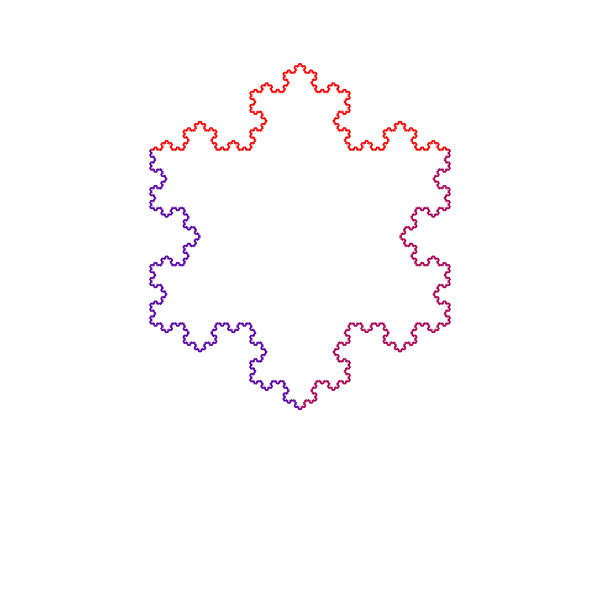

In [66]:
function koch(t::Turtle, length::Real, level::Int)
    sidelength = length/3
    if level == 0 || sidelength <= 0.5
        forward(t, length)
    else
        koch(t, sidelength, level-1)
        turn(t, -60)
        koch(t, sidelength, level-1)
        turn(t, 120)
        koch(t, sidelength, level-1)
        turn(t, -60)
        koch(t, sidelength, level-1)
    end
end

function snowflake(t::Turtle, length::Real, kochs::Int)
    t.xpos, t.ypos = -length/2, -length/2
    stepcolor(c, delta) = c + [-delta, 0, delta]
    color = [1.0, 0.0, 0.0]
    t.pencolor = tuple(color...)
    @svg begin
        for i = 1:3
            koch(t, length, kochs)
            color = stepcolor(color, 0.33)
            t.pencolor = tuple(color...)
            turn(t, 120)
        end
    end
end

🐢 = Turtle()
snowflake(🐢,300, 9)

## Chapter Six : Fruitful aka *Pure* Functions

Write a `compare` function takes two values, `x` and `y`, and returns `1` if `x > y`, `0` if `x == y`, and `-1` if `x < y`.

In [67]:
function compare(x::T, y::T ) where {T <: Real}
    if x>y
        return 1
    elseif x<y
        return -1
    else
        return 0
    end
end

compare(2,2)

0

Use incremental development to write a function called `hypotenuse` that returns the length of the hypotenuse of a right triangle given the lengths of the other two legs as arguments. Record each stage of the development process as you go.

In [68]:
function hypotenuse(height::T, base::T)::T where {T <: Real}
    println("sides: ",string(height),", ",string(base))
    println("squares: $(height^2), $(base^2)")
    println("sum of squares: $(height^2 + base^2)")
    println("square root of sums of squares: $((height^2 + base^2)^0.5)")
    return (height^2 + base^2)^0.5
end

hypotenuse(3, 4)

sides: 3, 4
squares: 9, 16
sum of squares: 25
square root of sums of squares: 5.0


5

Write a function `isbetween(x, y, z)` that returns `true` if `x ≤ y ≤ z` or `false` otherwise.

In [69]:
function isbetween(x::T, y::T, z::T)::Bool where {T <: Real}
    if x<= y && y <= z
        return true
    else
        return false
    end
end

isbetween(2,3,4)

true

The Ackermann function, A(m,n), is defined:
    \begin{equation}
    {A(m, n) =
    \begin{cases}
                  n+1& \textrm{if}\ m = 0 \\
        A(m-1, 1)& \textrm{if}\ m > 0\ \textrm{and}\ n = 0 \\
A(m-1, A(m, n-1))& \textrm{if}\ m > 0\ \textrm{and}\ n > 0.
\end{cases}}
\end{equation}

See https://en.wikipedia.org/wiki/Ackermann_function. Write a function named `ack` that evaluates the Ackermann function. Use your function to evaluate `ack(3, 4)`, which should be 125. What happens for larger values of `m` and `n`?

In [70]:
function ack(m::T, n::T)::T where{T <: Union{Int, BigInt}}
    if m == 0
        return n+1
    elseif m > 0
        if n == 0
            return ack(m-1, 1)
        elseif n > 0
            return ack(m-1, ack(m, n-1))
        end
    end
end

ack(3, 14)
# larger values will cause stack overflow (!)

131069

A palindrome is a word that is spelled the same backward and forward, like “noon” and “redivider”. Recursively, a word is a palindrome if the first and last letters are the same and the middle is a palindrome.

The following are functions that take a string argument and return the first, last, and middle letters:

```julia
function first(word)
    first = firstindex(word)
    word[first]
end

function last(word)
    last = lastindex(word)
    word[last]
end

function middle(word)
    first = firstindex(word)
    last = lastindex(word)
    word[nextind(word, first) : prevind(word, last)]
end
```


We’ll see how they work in Strings

* Test these functions out. What happens if you call middle with a string with two letters? One letter? What about the empty string, which is written `""` and contains no letters?

* Write a function called `ispalindrome` that takes a string argument and returns `true` if it is a palindrome and `false` otherwise. Remember that you can use the built-in function length to check the length of a string.

In [71]:
function ispalindrome(s::String)::Bool
    s = lowercase(s)
    if length(s) == 1 || s == ""
        return true
    elseif length(s) == 2 && s[firstindex(s)] == s[lastindex(s)]
        return true
    elseif s[firstindex(s)] == s[lastindex(s)]
        ispalindrome(s[nextind(s, firstindex(s)):prevind(s, lastindex(s))])
    else
        return false
    end
end

ispalindrome("redivider")

true

A number, `a`, is a power of `b` if it is divisible by `b` and $\frac{a}{b}$ is a power of `b`. Write a function called `ispower` that takes parameters `a` and `b` and returns `true` if `a` is a power of `b`.

In [72]:
function ispower(a::T, b::T)::Bool where {T <: Union{Int64, BigInt}}
    println("a, b: ",string(a),", ",string(b))
    if div(a, b) == 1
        return true
    elseif a % b == 0
        return ispower(div(a, b), b)
    else
        return false
    end
end

ispower(32, 2)

a, b: 32, 2
a, b: 16, 2
a, b: 8, 2
a, b: 4, 2
a, b: 2, 2


true

The greatest common divisor ($GCD$) of `a` and `b` is the largest number that divides both of them with no remainder.

One way to find the $GCD$ of two numbers is based on the observation that if `r`
is the remainder when `a` is divided by `b`, then `gcd(a, b) = gcd(b, r)`. As a base case, we can use `gcd(a, 0) = a`.

Write a function called `gcd` that takes parameters `a` and `b` and returns their greatest common divisor.


In [73]:
function do_gcd(a::T, b::T)::T where {T <: Int}
    println("a, b: ",string(a),", ",string(b))
    if b == 0
        return a
    else
        do_gcd(b, a%b)
    end
end
    
do_gcd(91, 13)

a, b: 91, 13
a, b: 13, 0


13

## Chapter Seven : Iteration

* Rewrite the function printn from Recursion using iteration instead of recursion.
```julia
function printn(s, n)
    if n ≤ 0
        return
    end
    println(s)
    printn(s, n-1)
end
```

In [74]:
function printn(s::Any, n::Int)::Nothing
    println("Using Iterations")
    while n > 0
        println(s)
        n = n - 1
    end
    return
end

printn("foo", 5)

	foo	n:5
	foo	n:4
	foo	n:3
	foo	n:2
	foo	n:1


Copy the loop from `Square Roots` and encapsulate it in a function called `mysqrt` that takes `a` as a parameter, chooses a reasonable value of `x`, and returns an estimate of the square root of `a`.

```julia
while true
    println(x)
    y = (x + a/x) / 2
    if y == x
        break
    end
    x = y
end
```

To test it, write a function named `testsquareroot` that prints a table like this:

```console
a   mysqrt             sqrt               diff
-   ------             ----               ----
1.0 1.0                1.0                0.0
2.0 1.414213562373095  1.4142135623730951 2.220446049250313e-16
3.0 1.7320508075688772 1.7320508075688772 0.0
4.0 2.0                2.0                0.0
5.0 2.23606797749979   2.23606797749979   0.0
6.0 2.449489742783178  2.449489742783178  0.0
7.0 2.6457513110645907 2.6457513110645907 0.0
8.0 2.82842712474619   2.8284271247461903 4.440892098500626e-16
9.0 3.0                3.0                0.0
```
The first column is a number, `a`; the second column is the square root of `a` computed with `mysqrt`; the third column is the square root computed by `sqrt`; the fourth column is the absolute value of the difference between the two estimates.

In [75]:
using Printf
function newton_sqrt(a::Real)::Real
    x = 1
    while true
    y = (x + a/x) / 2
    if y == x
        break
    end
    x = y
    end
    return x
end

function mytestsquareroot()::Nothing
    println("a\tmysqrt\t\t\tsqrt\t\t\tdiff")
    println("-\t------\t\t\t----\t\t\t----")
    for i=1:10
        a, b = newton_sqrt(i), sqrt(i)
        c = a - b
        s = @sprintf("%.0f\t%.3f\t\t\t%.3f\t\t\t%.9f", float(i),a,b,c)
        println(s)
    end
end

mytestsquareroot()

a	mysqrt			sqrt			diff
-	------			----			----
1	1.000			1.000			0.000000000
2	1.414			1.414			-0.000000000
3	1.732			1.732			0.000000000
4	2.000			2.000			0.000000000
5	2.236			2.236			0.000000000
6	2.449			2.449			0.000000000
7	2.646			2.646			0.000000000
8	2.828			2.828			-0.000000000
9	3.000			3.000			0.000000000
10	3.162			3.162			-0.000000000


The built-in function `Meta.parse` takes a string and transforms it into an expression. This expression can be evaluated in Julia with the function `Core.eval`. For example:

```julia
julia> expr = Meta.parse("1+2*3")
:(1 + 2 * 3)
julia> Core.eval(Main, expr)
7
julia> expr = Meta.parse("sqrt(π)")
:(sqrt(π))
julia> Core.eval(Main, expr)
1.7724538509055159
```
Write a function called `evalloop` that iteratively prompts the user, takes the resulting input and evaluates it using `Core.eval`, and prints the result. It should continue until the user enters `done`, and then return the value of the last expression it evaluated.

In [77]:
function evalloop()::Nothing
    while true
        println("Enter your expression, enter 'done' to Escape"); expr=readline()
        if expr == "done"
            break
        else
            expr = Meta.parse(expr)
            println("Eval: $(Core.eval(Main, expr))")
        end
        end
end

evalloop()

Enter your expression, enter 'done' to Escape
stdin> 999+6666
Eval: 7665
Enter your expression, enter 'done' to Escape
stdin> done


The mathematician Srinivasa Ramanujan found an infinite series that can be used to generate a numerical approximation of $\frac{1}{\pi}$

\begin{equation}
{\frac{1}{\pi}=\frac{2\sqrt2}{9801}\sum_{k=0}^\infty\frac{(4k)!(1103+26390k)}{(k!)^4 396^{4k}}}
\end{equation}

Write a function called `estimatepi` that uses this formula to compute and return an estimate of $π$. It should use a while loop to compute terms of the summation until the last term is smaller than `1e-15` (which is Julia notation for $10^{-15}$). You can check the result by comparing it to $π$. 

In [78]:
# memoization
const facmem = Dict{Int, Int}()
const srpi_const = 2*sqrt(2)/9801

function fac(num::T)::T where {T <: Int}
    get!(facmem, num) do
        num == 0 || num == 1 ? 1 : num * fac(num-1) 
    end
end

eval_k(k::Int64)::Float64 = fac(4k)*(1103 + 26390k)/((fac(k)^4)*(396^4k))

function estimatepi()::Float64
    limit, val, eval = 0, 0.0, 0.0
    while true
        eval = eval_k(limit)
        limit += 1
        if eval > 1e-15
            val += eval
        else
            break
        end
    end
    est_pi = 1 / (srpi_const*val)
end

estimatepi()

3.1415926535897936

## Chapter Eight : Strings

Write a function that takes a string as an argument and displays the letters backward, one per line.

In [79]:
function revstring(s::String)::Nothing
    while true
        if length(s) == 1
            println(s)
            break
        end
        last = lastindex(s)
        println(s[last])
        s = s[1:prevind(s, last)]
    end
end

revstring("foo")

o
o
f


The following example shows how to use concatenation (string multiplication) and a for loop to generate an abecedarian series (that is, in alphabetical order). In Robert McCloskey’s book Make Way for Ducklings, the names of the ducklings are Jack, Kack, Lack, Mack, Nack, Ouack, Pack, and Quack. This loop outputs these names in order:

```Julia
prefixes = "JKLMNOPQ"
suffix = "ack"

for letter in prefixes
    println(letter * suffix)
end
```
```output
Output:

Jack
Kack
Lack
Mack
Nack
Oack
Pack
Qack
```
Of course, that’s not quite right because “Ouack” and “Quack” are misspelled.

Modify the program to fix this error.


In [80]:
function dualprefix()::Nothing
    prefixes, suffix, altsuffix = "JKLMNOPQ", "ack", "uack"
    for letter in prefixes
        if letter in "OQ"
            println(letter * altsuffix)
        else
            println(letter * suffix)
        end
    end
end

dualprefix()

Jack
Kack
Lack
Mack
Nack
Ouack
Pack
Quack


what do you think `str[:]` means? Try it and see.

In [81]:
str = "Julius Caesar";
println(str[:])

Julius Caesar


Modify `find` so that it has a third parameter, the index in `word` where it should start looking.
```julia
function find(word, letter)
    index = firstindex(fruits)
    while index <= sizeof(word)
        if word[index] == letter
            return index
        end
        index = nextind(word, index)
    end
    -1
end
```

In [82]:
function altfind(word::String, letter::String, start::Int)::Int
    index = start
    while index <= sizeof(word)
        if (string(word[index])) == letter
            return index
        end
        index = nextind(word, index)
    end
    -1
end
altfind("foyobar", "o", 3)

4

Encapsulate this code in a function named count, and generalize it so that it accepts the string and the letter as arguments.
```julia
word = "banana"
count = 0
for letter in word
    if letter == 'a'
        global count = count + 1
    end
end
println(count)
```
Then rewrite the function so that instead of traversing the string, it uses the three-parameter version of find from the previous section.

In [83]:
function strcount(word::String, letter::String)::Int
    subsearches = [altfind(string(s), letter, 1) for s in word]
    return sum(subsearches[subsearches.==1])
end

strcount("banana", "a")

3

There is a builtin function called `count` that is similar to the function in Looping and Counting. Read the documentation of this function and use it to count the number of a’s in "banana".

In [84]:
count([s=='a' for s in "banana"])

3

A string slice can take a third index. The first specifies the start, the third the end and the second the “step size”; that is, the number of spaces between successive characters. A step size of 2 means every other character; 3 means every third, etc.

```julia
julia> fruit = "banana"
"banana"
julia> fruit[1:2:6]
"bnn"
```

A step size of -1 goes through the word backwards, so the slice `[end:-1:1]` generates a reversed string.

Use this idiom to write a one-line version of `ispalindrome`

In [85]:
ispalindrome_one(x::String)::Bool = x == x[end:-1:1]
ispalindrome_one("tattarrattat")

true

A Caesar cypher is a weak form of encryption that involves “rotating” each letter by a fixed number of places. To rotate a letter means to shift it through the alphabet, wrapping around to the beginning if necessary, so `’A’` rotated by 3 is `’D’` and `’Z’` rotated by 1 is `’A’`.

To rotate a word, rotate each letter by the same amount. For example, "cheer" rotated by 7 is `"jolly"` and `"melon"` rotated by -10 is `"cubed"`. In the movie $2001: A Space Odyssey$, the ship computer is called `HAL`, which is `IBM` rotated by `-1`.

Write a function called `rotateword` that takes a string and an integer as parameters, and returns a new string that contains the letters from the original string rotated by the given amount.

Potentially offensive jokes on the Internet are sometimes encoded in ROT13, which is a Caesar cypher with rotation 13. If you are not easily offended, find and decode some of them.


In [86]:
@everywhere const letterbook = [s for s in "abcdefghijklmnopqrtsuvwxyz"];

@everywhere function rotateword(word::String, shift::Int)::String
    rotshift(x::Int, y::Int)::Int = x+y > 26 ? x+y-26 : x+y
    wordarray = [letterbook[rotshift(findfirst(letterbook .== s),shift)] for s in word]
    return join(wordarray, "")
end

In [87]:
@time rotateword("cheer", 7)

  0.116131 seconds (481.38 k allocations: 23.168 MiB, 7.74% gc time)


"jolly"

## Chapter Nine : Case Study on Word Play

Write a program that reads `words.txt` and prints only the words with more than 20 characters (not counting whitespace).

In [88]:
function readtwenty()
    for line in eachline("words.txt")
        if length(line) > 20
            println(line)
        end
    end
end
    
readtwenty() #words.txt is not available at link!

counterdemonstrations
hyperaggressivenesses
microminiaturizations


Write a function called `hasno_e` that returns true if the given word doesn’t have the letter e in it

In [89]:
function hasno_e(word::String)::Bool
    return !('e' in word)
end

hasno_e("foo")

true

Write a function named `avoids` that takes a word and a string of forbidden letters, and that returns true if the word doesn’t use any of the forbidden letters.

In [90]:
function avoids(word::String, letters::String)::Bool
    return all([!(letter in word) for letter in letters])
end

avoids("foobar", "exist")

true

Write a function named `usesonly` that takes a word and a string of letters, and that returns true if the word contains only letters in the list. Can you make a sentence using only the letters `acefhlo?` Other than `"Hoe alfalfa?"`

In [91]:
function usesonly(word::String, letters::String)::Bool
    word = filter(c -> ~isspace(c), lowercase(word))
    return all([letter in letters for letter in word])
end

usesonly("Hoe alfalfa?", "acefhlo?")

true

Write a function named usesall that takes a word and a string of required letters, and that returns true if the word uses all the required letters at least once. How many words are there that use all the vowels `aeiou?`, `How about aeiouy?` 

In [92]:
function usesall(word::String, letters::String)::Bool
    word = filter(c -> ~isspace(c), lowercase(word))
    return all([letter in word for letter in letters])
end

usesall("How about aeiouy?", "aeiou?")

true

Write a function called `isabecedarian` that returns true if the letters in a word appear in alphabetical order (double letters are ok). How many `abecedarian` words are there? 

In [93]:
function isabecederian(word::String)::Bool
    word = filter(c -> ~isspace(c), lowercase(word))
    indices = [Int(w) for w in word]
    return indices == sort(indices)
end
    
isabecederian("art")

true

> Give me a word with three consecutive double letters. I’ll give you a couple of words that almost qualify, but don’t. For example, the word committee, `c-o-m-m-i-t-t-e-e`. It would be great except for the i that sneaks in there. Or Mississippi: `M-i-s-s-i-s-s-i-p-p-i`. If you could take out those `i’s` it would work. But there is a word that has three consecutive pairs of letters and to the best of my knowledge this may be the only word. Of course there are probably 500 more but I can only think of one. What is the word?

In [94]:
function threepuzzle(word::String)::Bool
    if length(word) < 6
        return false
    end
    is_same(x) = x[1] == x[2] ? true : false
    twins = [word[i:i+1] for i = 1:sizeof(word)-1]
    #println("twinpairs: ",twins)
    is_twin = [is_same(x) for x in twins]
    #println("equal pairs: ", is_twin)
    c3s = [all(is_twin[i:2:i+4]) for i = 1:length(is_twin)-4]
    #println("successful triplets: ", c3s)
    return any(c3s)
end

println(threepuzzle("ssppii"))
println(threepuzzle("mississippi"))
println(threepuzzle("committee"))
println(threepuzzle("commttee"))

true
false
false
true


> I was driving on the highway the other day and I happened to notice my odometer. Like most odometers, it shows six digits, in whole miles only. So, if my car had 300000 miles, for example, I’d see 3-0-0-0-0-0.

> Now, what I saw that day was very interesting. I noticed that the last 4 digits were palindromic; that is, they read the same forward as backward. For example, 5-4-4-5 is a palindrome, so my odometer could have read 3-1-5-4-4-5.

> One mile later, the last 5 numbers were palindromic. For example, it could have read 3-6-5-4-5-6. One mile after that, the middle 4 out of 6 numbers were palindromic. And you ready for this? One mile later, all 6 were palindromic!

> The question is, what was on the odometer when I first looked?



In [95]:
function odo_palindrome(stringify::String)::Bool
    # cannot account for lengths < 6
    one, two = stringify[end-3:end], stringify[end-4:end]
    two = string(parse(Int, two) + 1)
    return all([ispalindrome_one(one), ispalindrome_one(two)])
end

function pad_tosix(num::Int)::String
    stringify = string(num)
    to_pad = 6 - length(stringify)
    return to_pad > 0 ? repeat("0", to_pad) * string(num) : stringify
end

function find_seq()::Vector{String}
    retvals = Vector{String}()
    for num = 1:999999
        stringify = pad_tosix(num)
        if odo_palindrome(stringify)
            push!(retvals, stringify)
        end
    end
    return retvals
end

find_seq()

109-element Array{String,1}:
 "000110"
 "010000"
 "021111"
 "032222"
 "043333"
 "054444"
 "065555"
 "076666"
 "087777"
 "098888"
 "100000"
 "100110"
 "110000"
 ⋮       
 "898888"
 "900000"
 "900110"
 "910000"
 "921111"
 "932222"
 "943333"
 "954444"
 "965555"
 "976666"
 "987777"
 "998888"

> Recently I had a visit with my mom and we realized that the two digits that make up my age when reversed resulted in her age. For example, if she’s 73, I’m 37. We wondered how often this has happened over the years but we got sidetracked with other topics and we never came up with an answer.

> When I got home I figured out that the digits of our ages have been reversible six times so far. I also figured out that if we’re lucky it would happen again in a few years, and if we’re really lucky it would happen one more time after that. In other words, it would have happened 8 times over all. So the question is, how old am I now?



In [96]:
# six times ?
using Base.Iterators
function pad_two(num::Int)::String
    stringify = string(num)
    to_pad = 2 - length(stringify)
    return to_pad > 0 ? repeat("0", to_pad) * string(num) : stringify
end

function zipsolve(base::Array{Int, 1}, delta::Int)::Int
    ret = [tuple(x, y) for (x, y) in zip(base, base .- delta) if y > 0]
    ret = [(pad_two(x), pad_two(y)) for (x, y) in ret]
    return count([x[1] == reverse(x[2]) for x in ret])
end

function getage_diff(mincount::Int)::Dict{Int, Int}
    # mom can live upto the age of 127 (?)
    mom_ages::Array{Int, 1} = [i for i=14:127]
    # assuming the son is younger by atleast 14 years
    # and atmost by 70 years
    ages_diff::Array{Int, 1} = [i for i=14:70]
    ages_book::Dict{Int64,Int64} = Dict(x=>zipsolve(mom_ages, x) for x in ages_diff)
    return filter(kv -> kv[2] >= mincount, ages_book)
end
            
function parse_age_diffs(max_occs::Int, occ_count::Int)::Nothing
    ages_book::Dict{Int, Int} = getage_diff(max_occs)
    for kv in ages_book
        age_diff::Int = kv[1]
        age = [i for i = age_diff:127 if (pad_two(i) == reverse(pad_two(i-age_diff)))]
        age = age[occ_count] - age_diff
        println("If the Age-Difference is $(age_diff) years, and the son's age must be: $(age)", )
    end
end
                            
parse_age_diffs(8, 6)

If the Age-Difference is 18 years, and the son's age must be: 57


## Chapter Ten : Arrays

Write a function called `nestedsum` that takes an array of arrays of integers and adds up the elements from all of the nested arrays.

In [97]:
function nestedsum(t::AbstractArray)::Real
    return sum(sum(collect(flatten(f))) for f in t)
end
    
nestedsum([[1, 2], [3], [4, 5, 6], [[1, 2],[6, 7]]])

37

Write a function called `cumulsum` that takes an array of numbers and returns the cumulative sum; that is, a new array where the $i^{th}$ element is the sum of the first `i+1` elements from the original array.

In [98]:
function cumulsum(t::Array{T, 1})::Array{T, 1} where{T <: Union{Int, AbstractFloat, Complex, BigFloat}}
    @assert ndims(t) == 1 "input too many dimensions (!)"
    return [sum(t[1:i]) for i = 1:length(t)]
end

t = [1,2,3,4]
println(cumulsum(t))

t = [1.0,2.0,3.0,4.0]
println(cumulsum(t))

t = [1.0 + 1.0im, 3.2 + 2.3im, 3.5 - 9.1im, 2.01 + 0.01im]
println(cumulsum(t))

t = [1e213, 3e213, 9e212, 4e213]
println(cumulsum(t))

println("This is awesome!")

[1, 3, 6, 10]
[1.0, 3.0, 6.0, 10.0]
Complex{Float64}[1.0+1.0im, 4.2+3.3im, 7.7-5.8im, 9.71-5.79im]
[1.0e213, 4.0e213, 4.9e213, 8.9e213]
This is awesome!


Write a function called `interior` that takes an array and returns a new array that contains all but the first and last elements.?

In [99]:
function interior(t::Array{T, 1})::Array{T, 1} where{T <: Union{Int, AbstractFloat}}
    @assert length(t) >= 3 "Array is too short to return an interior (!)"
    return [t[i] for i = 2:length(t)-1]
end

t = [1,2,3,4]
print(interior(t))

[2, 3]

Write a function called `interior!` that takes an array, modifies it by removing the first and last elements, and returns `nothing`.

In [100]:
function interior!(t::Array{T, 1} where{T <: Union{Int, AbstractFloat}})::Nothing
    @assert length(t) >= 3 "Array is too short to return an interior (!)"
    deleteat!(t,(1,length(t)))
    return
end

t = [1,2,3,4]
interior!(t)
print(t)

[2, 3]

Write a function called `issort` that takes an array as a parameter and returns `true` if the array is sorted in ascending order and `false` otherwise.

In [101]:
function issort(t::Array{T, 1} where{T <: Union{Int, AbstractFloat}})::Bool
    return t == sort(t)
end

t = [1,4,3,2]
println(issort(t))

t = [1,2,3,4]
println(issort(t))

false
true


Two words are anagrams if you can rearrange the letters from one to spell the other. Write a function called `isanagram` that takes two strings and returns `true` if they are anagrams. 

In [102]:
function isanagram(s1::String, s2::String)::Bool
    return sort([s for s in s1]) == sort([s for s in s2])
end

s1, s2 =  "stressed", "desserts"
println(isanagram(s1, s2))

s1, s2 =  "spangle", "wrangle"
println(isanagram(s1, s2))

true
false


Write a function called `hasduplicates` that takes an array and returns true if there is any element that appears more than once. It should not modify the original array.

In [103]:
function hasduplicates(s::T where {T <: Union{String, Array}})::Bool 
    d = Dict{eltype(s), Int}()
    for v in s
        d[v] = get!(d, v, 0) + 1
    end
    return maximum(values(d)) > 1
end

println(hasduplicates("sassy"))
println(hasduplicates("quick"))
println(hasduplicates([1,2,33,3,3,44]))

true
false
true


This exercise pertains to the so-called Birthday Paradox, which you can read about at https://en.wikipedia.org/wiki/Birthday_paradox.

If there are 23 students in your class, what are the chances that two of you have the same birthday? You can estimate this probability by generating random samples of 23 birthdays and checking for matches.

This answer uses an approximations from solutions to hash collision problems , instead of random numbers
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/85e10a5ef850209f4f2010865e273fc0ce51d35b)

In [104]:
function bdayparadox(numstudents::Int)::Float64
    return 1 - ((365 -1)/365)^(0.5numstudents*(numstudents-1))
end

println(bdayparadox(23))

0.5004771540365807


This answer uses random trials.

In [105]:
using Distributed

@everywhere struct randfield{T<:Float32}
    hasdupes::Float32
    function randfield(rrange::UnitRange{Int}, size::Int, samplesize::Int)::T where {T <: Float32}
        u::Int = length(Set(rand(rrange, size)))
        x::Float32 = size > u ? 1.0/samplesize : 0.0
        new{Float32}(x)
    end
end

@everywhere function cbdayrand(numstudents::Int, numtrials::Int)::Float32
    seq::Float32 = 0.0
    seq = @distributed (+)for i = 1:numtrials
       randfield(1:365, numstudents, numtrials).hasdupes
    end
    return seq
end

In [107]:
@time cbdayrand(23, 1000000)

  0.422069 seconds (1.01 k allocations: 73.297 KiB)


0.50727624f0

## Chapter Eleven : Dictionaries

Use get to write histogram more concisely. You should be able to eliminate the if statement.

```julia
function histogram(s)
    d = Dict()
    for c in s
        if c ∉ keys(d)
            d[c] = 1
        else
            d[c] += 1
        end
    end
    d
end
```

In [108]:
function histogram(s::T where T <: Union{String, AbstractArray})::Dict{Any, Int}
    d = Dict{eltype(s), Int}()
    for v in s
        d[v] = get(d, v, 0) + 1
    end
    return d
end

histogram("brontosaurus")

Dict{Any,Int64} with 8 entries:
  'n' => 1
  's' => 2
  'a' => 1
  'r' => 2
  't' => 1
  'o' => 2
  'u' => 2
  'b' => 1

Read the documentation of the dictionary function get! and use it to write a more concise version of `invertdict`.

In [109]:
function invertdict(d::AbstractDict)::Dict{Int, AbstractArray}
    id = Dict{Int, AbstractArray}()
    for kv in d
        id[kv[2]] = push!(get(id, kv[2], []), kv[1])
    end
    return id
end

h = histogram("brontosaurus")
invertdict(h)

Dict{Int64,AbstractArray} with 2 entries:
  2 => Any['s', 'r', 'o', 'u']
  1 => Any['n', 'a', 't', 'b']

Memoize the `Ackermann` function and see if memoization makes it possible to evaluate the function with bigger arguments.

In [110]:
const ackdict = Dict{Tuple{Signed, Signed}, Signed}() 

Dict{Tuple{Signed,Signed},Signed} with 0 entries

In [111]:
function mem_ack(m::T, n::T)::T where{T <: Union{Int, BigInt}}
    get!(ackdict, (m, n)) do
        if m == 0
            return n+1
        elseif m > 0
            if n == 0
                return ack(m-1, 1)
            elseif n > 0
                return ack(m-1, ack(m, n-1))
            end
        end
    end
end

println(mem_ack(3, 3))
ackdict

61


Dict{Tuple{Signed,Signed},Signed} with 1 entry:
  (3, 3) => 61

In [112]:
function mem_ack_2(m::T, n::T)::T where{T <: Union{Int, BigInt}}
    if (m, n) ∈ keys(ackdict)
        return ackdict[(m, n)]
    end
    if m == 0
        ackdict[(m, n)] = n+1
        return n+1
    elseif m > 0
        if n == 0
            res = ack(m-1, 1)
            ackdict[(m-1, 1)] = res
            return res
        elseif n > 0
            res = ack(m, n-1)
            ackdict[(m, n-1)] = res
            res2 = ack(m-1, res)
            ackdict[(m-1, res)] = res2
            return res2
        end
    end
end

println(mem_ack_2(3, 14))
ackdict

131069


Dict{Tuple{Signed,Signed},Signed} with 3 entries:
  (3, 3)     => 61
  (3, 13)    => 65533
  (2, 65533) => 131069

No improvement from memoization was observed(!)

You already have a function named `hasduplicates` that takes an array as a parameter and returns true if there is any object that appears more than once in the array.

Use a dictionary to write a faster, simpler version of `hasduplicates`.

> it's already using dictionaries :)


In [113]:
function hasduplicates(s::T where {T <: Union{String, Array}})::Bool 
    d = Dict{eltype(s), Int}()
    for v in s
        d[v] = get!(d, v, 0) + 1
    end
    return maximum(values(d)) > 1
end

println(hasduplicates("sassy"))
println(hasduplicates("quick"))
println(hasduplicates([1,2,33,3,3,44]))

true
false
true


Two words are `“rotate pairs”` if you can rotate one of them and get the other (see `rotateword` ).

Write a program that reads a word array and finds all the rotate pairs.


In [114]:
function rotpairs(s::String)::Dict{String, Tuple{String, Int}}
    d = Dict{String, Tuple{String, Int}}()
    parsed::Array{String, 1} = split(s, (' ', '\n'))
    rotarray(sub::String)::Array{Tuple{String, Int}, 1} = [(rotateword(sub, i), i) for i=1:25]
    for sub in parsed
        parseltounged = rotarray(sub)
        inparsed::Array{Tuple{String,Int64},1} = filter(x -> x[1] in parsed, parseltounged)
        if !isempty(inparsed)
            d[sub] = inparsed[1]
        end
    end
    return d
end

function threadedrotpairs(s::String)::Dict{String, Tuple{String, Int}}
    d = Dict{String, Tuple{String, Int}}()
    parsed::Array{String, 1} = split(s, (' ', '\n'))
    rotarray(sub::String)::Array{Tuple{String, Int}, 1} = [(rotateword(sub, i), i) for i=1:25]
    Threads.@threads for sub in parsed
        parseltounged = rotarray(sub)
        inparsed::Array{Tuple{String,Int64},1} = filter(x -> x[1] in parsed, parseltounged)
        if !isempty(inparsed)
            d[sub] = inparsed[1]
        end
    end
    return d
end

threadedrotpairs (generic function with 1 method)

In [115]:
println(keys(rotpairs("cheer jolly melon hal is ibm cubed")))
println(keys(threadedrotpairs("cheer jolly melon hal is ibm cubed")))

["hal", "ibm", "cubed", "melon", "cheer", "jolly"]
["jolly", "ibm", "cubed", "melon", "cheer", "hal"]


In [116]:
question = """jolly cheer melon cubed hal ibm ant
            nag nowhere chechen purpura envy
            ares nerf abjurer fubar url hey png
            ones rail run aha shone barf cat"""

@time rotpairs(question)
@time threadedrotpairs(question)

  0.018000 seconds (17.57 k allocations: 12.326 MiB, 73.60% gc time)
  0.021247 seconds (16.30 k allocations: 11.252 MiB)


Dict{String,Tuple{String,Int64}} with 14 entries:
  "envy"    => ("rail", 13)
  "ibm"     => ("hal", 25)
  "melon"   => ("cubed", 16)
  "rail"    => ("envy", 13)
  "abjurer" => ("nowhere", 13)
  "purpura" => ("chechen", 13)
  "hey"     => ("url", 13)
  "nowhere" => ("abjurer", 13)
  "jolly"   => ("cheer", 19)
  "url"     => ("hey", 13)
  "chechen" => ("purpura", 13)
  "cubed"   => ("melon", 10)
  "hal"     => ("ibm", 1)
  "cheer"   => ("jolly", 7)

[TODO]: Exercise 11-7
* Not all words are unique as some words with same spellings have different homophones.
* Dictionary also has words with symbols along with pure words, which are not appropriate for this exercise, and will need filtering.
* [This looks more promising](https://github.com/TSMMark/homophone/blob/master/lib/assets/homophone_list.csv)

## Chapter Twelve : Tuples

Write a function called `sumall` that takes any number of arguments and returns their sum. 

In [11]:
function sumall(varargs...)
    return sum(varargs)
end

sumall(1,2,'3')


'6': ASCII/Unicode U+0036 (category Nd: Number, decimal digit)

Write a function called `mostfrequent` that takes a string and prints the letters in decreasing order of frequency. 

In [12]:
# updates the same dictionary everytime the function is called, 
# so can be used iteratively over different sequences to
# estimate global frequencies
const countdict = Dict{Char, Int}()

function mostfrequent(str::String)::Array{Tuple{Int64,Char},1}
    str = lowercase(replace(str, r"[^A-z]"=>""))
    global countdict
    for s in str
        countdict[s] = get(countdict, s, 0) + 1
    end
    retval::Array{Tuple{Int64,Char},1} = collect((kv[2], kv[1]) for kv in countdict)
    return sort(retval, by = x -> x[1], rev=true )
end

mostfrequent (generic function with 1 method)

In [13]:
question2 = """ The lobster and the crab one day
            Proposed a friendly race.
            Agreed upon the time were they,
            Agreed upon the place.

            The start and finish lines were where
            The two thought they should be.
            The crayfish with a clock was there
            To act as referee.

            And though the rule-book then was read,
            Not all was clarified;
            For as the lobster forward sped
            The crab crab went to the side.
            """

mostfrequent(question2)

21-element Array{Tuple{Int64,Char},1}:
 (46, 'e')
 (30, 't')
 (25, 'a')
 (24, 'h')
 (24, 'r')
 (19, 'o')
 (15, 's')
 (14, 'd')
 (12, 'n')
 (11, 'l')
 (10, 'w')
 (10, 'i')
 (10, 'c')
 (7, 'f') 
 (7, 'b') 
 (6, 'p') 
 (6, 'u') 
 (5, 'y') 
 (4, 'g') 
 (2, 'k') 
 (1, 'm') 

Write a program that reads a word list from a file and prints all the sets of words that are anagrams.

Here is an example of what the output might look like:

```julia

    ["deltas", "desalt", "lasted", "salted", "slated", "staled"]
    ["retainers", "ternaries"]
    ["generating", "greatening"]
    ["resmelts", "smelters", "termless"]
```

* Modify the previous program so that it prints the longest list of anagrams first, followed by the second longest, and so on.

* In Scrabble a “bingo” is when you play all seven tiles in your rack, along with a letter on the board, to form an eight-letter word. What collection of 8 letters forms the most possible bingos?



In [53]:
function readwords()::Vector{String}
    wordslist = []
    for line in eachline("words.txt")
        push!(wordslist, line)
    end
    return wordslist
end

readwords (generic function with 1 method)

In [15]:
function get_anagrams(wordslist::Vector{String})::Dict{String, Vector{String}}
    wordsset = Dict{String, Vector{String}}()
    
    for word in wordslist
        key = join(sort([l for l in word]))
        wordsset[key] = push!(get!(wordsset, key, []), word)
    end
    return filter!(kv -> length(kv[2]) >= 2, wordsset)
end

function sort_anagrams(anagramsdict::Dict{String, Vector{String}})::Array{Vector{String},1}
    return sort(collect(values(anagramsdict)), by = x -> length(x), rev=true)
end

@inline function get_bingos(anagrams::Array{Vector{String},1})::Vector{String}
    return filter(x -> length(x[1])==8, anagrams)[1]
end

get_bingos (generic function with 1 method)

In [16]:
@time get_bingos(sort_anagrams(get_anagrams(readwords())))

  0.533612 seconds (2.41 M allocations: 129.341 MiB, 17.03% gc time)


7-element Array{String,1}:
 "angriest"
 "astringe"
 "ganister"
 "gantries"
 "granites"
 "ingrates"
 "rangiest"

Two words form a `“metathesis pair”` if you can transform one into the other by swapping two letters; for example, “converse” and “conserve”. Write a program that finds all of the metathesis pairs in the dictionary. 

In [17]:
function ismetapair(str1::String, str2::String, len::Int = 2)::Bool
    @assert length(str1) == length(str2) "strings should be of the same lengths(!)"
    return count([s for s in str1] .!= [s for s in str2]) == len
end

function get_combs(x::Vector{String})::Vector{Tuple{String, String}}
    return filter(issorted , filter(k -> k[1] != k[2], collect(product(x, x))))
end

function getmetapairs(seq::Vector{String})::Vector{Tuple{String, String}}
    return filter(x -> ismetapair(x...), get_combs(seq)::Vector{Tuple{String, String}})
end

@inline function find_metas()::Array{Tuple{String, String}}
    retpairs::Array{Tuple{String, String}} = []
    sortedset::Array{Vector{String},1} = sort_anagrams(get_anagrams(readwords()))
    Threads.@threads for seq in sortedset
        val = getmetapairs(seq)
        if !isempty(val)
            append!(retpairs, val)
        end
    end
    return retpairs
end

find_metas (generic function with 1 method)

In [18]:
@time find_metas()

  0.842469 seconds (3.56 M allocations: 248.326 MiB, 17.60% gc time)


3297-element Array{Tuple{String,String},1}:
 ("doty", "tody")          
 ("sabers", "sabres")      
 ("ganger", "nagger")      
 ("altruists", "ultraists")
 ("leavy", "vealy")        
 ("bodies", "dobies")      
 ("regelate", "relegate")  
 ("baht", "bath")          
 ("awning", "waning")      
 ("actions", "cations")    
 ("tired", "tried")        
 ("for", "fro")            
 ("algum", "almug")        
 ⋮                         
 ("brunet", "burnet")      
 ("tantaras", "tartanas")  
 ("omber", "ombre")        
 ("girding", "griding")    
 ("unrobes", "unsober")    
 ("pertest", "pretest")    
 ("gargle", "raggle")      
 ("calks", "lacks")        
 ("basis", "bassi")        
 ("dire", "ride")          
 ("reefed", "refeed")      
 ("lota", "tola")          

What is the longest English word, that remains a valid English word, as you remove its letters one at a time?

Now, letters can be removed from either end, or the middle, but you can’t rearrange any of the letters. Every time you drop a letter, you wind up with another English word. If you do that, you’re eventually going to wind up with one letter and that too is going to be an English word—one that’s found in the dictionary. I want to know what’s the longest word and how many letters does it have?

I’m going to give you a little modest example: Sprite. Ok? You start off with sprite, you take a letter off, one from the interior of the word, take the r away, and we’re left with the word spite, then we take the e off the end, we’re left with spit, we take the s off, we’re left with pit, it, and I.



* Interpretation:
    * letters are removed from either of the three positions, one at a time and the children are checked for validity

In [19]:
const wordbranches = Dict{String, Vector{String}}()

@inline function get_substrings(str::String)::Vector{String}
    
    @inline msplit_t(str::String)::String = join(split(str, str[trunc(Int, (1 + end)/2)]))
    @inline msplit_r(str::String)::String = join(split(str, str[round(Int, (1 + end)/2)]))
    
    get!(wordbranches, str) do
        if length(str)==1 || length(str)==0
            return [""]
        elseif length(str) == 2
            return [str[2:end], str[1:end-1]]
        elseif length(str) % 2 == 0
            return [str[2:end], msplit_t(str), msplit_r(str), str[1:end-1]]
        else
            return [str[2:end], msplit_r(str), str[1:end-1]]
        end
    end
end

get_substrings (generic function with 1 method)

In [20]:
@time get_substrings("sprites")

  0.045815 seconds (120.90 k allocations: 5.860 MiB)


3-element Array{String,1}:
 "prites"
 "sprtes"
 "sprite"

In [21]:
function reduce_words(words::Vector{String})::Dict{String, Set{String}}
    append!(words, ["a", "i"])
    knownreductions = Dict{String, Set{String}}(word => Set() for word in words)
    @inline vfilter(str::String)::Set{String} = Set(filter(x -> x in keys(knownreductions), get_substrings(str)::Vector{String}))
    
    for word in keys(knownreductions)
        valids = vfilter(word)
        union!(knownreductions[word], valids)
    end
    return knownreductions
end

function chainwords(wordset::Dict{String, Set{String}})::Dict{String, Int}
    chainlengths = Dict{String, Int}(word => 0 for word in keys(wordset))
    sortedwords::Vector{String} = sort(collect(keys(wordset)), by = k -> length(wordset[k]))
    for word in sortedwords
        if !isempty(wordset[word])
            chainlengths[word] = 1 + maximum(chainlengths[x] for x in wordset[word])
        end
    end
    return chainlengths
end

function show_chain()
    
    all_words::Vector{String} = readwords()
    wordset::Dict{String, Set{String}} = reduce_words(all_words)
    chainlengths::Dict{String, Int} = chainwords(wordset)
    
    maxlength = maximum(values(chainlengths))
    maxchains = filter(k -> chainlengths[k]==maxlength, collect(keys(wordset)))
    for w in maxchains
    word, count = w, 1
        while true
            print("\n$(count): $(word)")
            top = sort([w for w in wordset[word]], by = k -> chainlengths[k], rev=true)
            if length(top)==0
                break
            end
            word, count = top[1], count+1
            print(" ▶ ")
            
        end
        println()
    end
end

show_chain (generic function with 1 method)

In [22]:
@time show_chain()


1: stabled ▶ 
2: stable ▶ 
3: table ▶ 
4: tale ▶ 
5: ale ▶ 
6: ae ▶ 
7: a

1: scarpers ▶ 
2: scapes ▶ 
3: capes ▶ 
4: apes ▶ 
5: ape ▶ 
6: ae ▶ 
7: a

1: stabler ▶ 
2: stable ▶ 
3: table ▶ 
4: tale ▶ 
5: ale ▶ 
6: ae ▶ 
7: a

1: granters ▶ 
2: granter ▶ 
3: grater ▶ 
4: grate ▶ 
5: rate ▶ 
6: ate ▶ 
7: ae ▶ 
8: a

1: glanced ▶ 
2: lanced ▶ 
3: laced ▶ 
4: lace ▶ 
5: ace ▶ 
6: ae ▶ 
7: a

1: staddles ▶ 
2: stales ▶ 
3: tales ▶ 
4: tale ▶ 
5: ale ▶ 
6: ae ▶ 
7: a

1: upraises ▶ 
2: praises ▶ 
3: prases ▶ 
4: prase ▶ 
5: rase ▶ 
6: ras ▶ 
7: as ▶ 
8: a

1: stables ▶ 
2: tables ▶ 
3: tales ▶ 
4: tale ▶ 
5: ale ▶ 
6: ae ▶ 
7: a

1: pleaser ▶ 
2: please ▶ 
3: pleas ▶ 
4: plea ▶ 
5: lea ▶ 
6: la ▶ 
7: a
  2.033769 seconds (6.11 M allocations: 358.497 MiB, 30.38% gc time)


## Chapter Thirteen : Case Study on Data Structure Selection

Write a program that reads a file, breaks each line into words, strips whitespace and punctuation from the words, and converts them to lowercase.

In [46]:
function readfile(filename::String)::Vector{String}
    seq = []
    for line in readlines(filename)
        words = replace(replace(line, r"\s+'|([^A-Za-z',.])"=>s" "), r"([,.])" => s" \1 ")
        words = [lowercase(x) for x in split(words) if x!=""]
        append!(seq, words)
    end
    return seq
end

readfile (generic function with 1 method)

In [47]:
@time readfile("pride.txt")

  0.162824 seconds (2.00 M allocations: 88.946 MiB, 16.60% gc time)


137453-element Array{String,1}:
 "it"          
 "is"          
 "a"           
 "truth"       
 "universally" 
 "acknowledged"
 ","           
 "that"        
 "a"           
 "single"      
 "man"         
 "in"          
 "possession"  
 ⋮             
 "her"         
 "into"        
 "derbyshire"  
 ","           
 "had"         
 "been"        
 "the"         
 "means"       
 "of"          
 "uniting"     
 "them"        
 "."           

Modify your program from the previous exercise to read the book you downloaded, skip over the header information at the beginning of the file, and process the rest of the words as before.

Then modify the program to count the total number of words in the book, and the number of times each word is used

In [48]:
function countwords(words::Vector{String})::Vector{Pair{String, Int}}
    counts = Dict{String, Int}(word=>0 for word in words)
    for word in words
        counts[word] += 1
    end
    return sort(collect(counts), by= k -> counts[k[1]], rev=true)
end

countwords (generic function with 1 method)

In [49]:
bookwords = readfile("pride.txt")
@time countwords(bookwords)

  0.147306 seconds (209.27 k allocations: 10.758 MiB)


6362-element Array{Pair{String,Int64},1}:
         "," => 9132
         "." => 6180
       "the" => 4331
        "to" => 4163
        "of" => 3611
       "and" => 3584
       "her" => 2225
         "i" => 2069
         "a" => 1953
        "in" => 1880
       "was" => 1846
       "she" => 1710
      "that" => 1579
             ⋮      
  "persists" => 1   
   "lurking" => 1   
     "bound" => 1   
   "fresher" => 1   
 "uselessly" => 1   
      "bath" => 1   
   "inmates" => 1   
   "shorten" => 1   
 "exhausted" => 1   
 "authorise" => 1   
  "wavering" => 1   
  "feathers" => 1   

Modify the program from the previous exercise to print the 20 most frequently used words in the book.

In [50]:
function showtopwords(words::Vector{String}, top_k::Int = 20)
    counts = Dict{String, Int}()
    for word in words
        counts[word] = get!(counts, word, 0) + 1
    end
    toshow = sort(collect(counts), by= k -> counts[k[1]], rev=true)[1:top_k]
    for word in toshow
        println("$(word[1]):$(word[2])")
    end
end

showtopwords (generic function with 2 methods)

In [51]:
@time showtopwords(bookwords)

,:9132
.:6180
the:4331
to:4163
of:3611
and:3584
her:2225
i:2069
a:1953
in:1880
was:1846
she:1710
that:1579
it:1535
not:1429
you:1357
he:1336
his:1271
be:1241
as:1181
  0.273666 seconds (199.46 k allocations: 10.190 MiB, 49.07% gc time)


Modify the previous program to read a word list and then print all the words in the book that are not in the word list. How many of them are typos? How many of them are common words that should be in the word list, and how many of them are really obscure?

In [52]:
function getstats(arr::Vector{Int})::Tuple{Float32, Float32}
    mean = sum(arr)/length(arr)
    stdev = sqrt(sum((arr .- mean).^2)/length(arr))
    return mean, stdev
end

function analyse_wordfreqs(words::Vector{String}, compwords::Vector{String})
    counts = Dict{String, Int}(word=>0 for word in words)
    for word in words
        counts[word] += 1
    end
    frequencies = sort(collect(values(counts)), by= k -> k, rev=true)
    mean, stdev = getstats(frequencies)
    low, high = 1, mean + 2*stdev
    lowcounts = filter(kv -> kv[2] <= low, counts)
    highcounts = filter(kv -> kv[2] >= high, counts)
    println("\nPrinting unmatched obscure words..\n")
    println([string(w[1])*"\n" for w in lowcounts if !(w[1] in compwords)]...)
    println("\nPrinting unmatched common words..\n")
    println([string(w[1])*"\n" for w in highcounts if !(w[1] in compwords)]...)
end

analyse_wordfreqs (generic function with 1 method)

In [54]:
basewords = readwords()
@time analyse_wordfreqs(bookwords, basewords)


Printing unmatched obscure words..

hurst's
edward
jones's
neighbourhoods
favourite's
proportioned
friends'
implicitness
nobody's
unalterable
tradesman's
sympathise
parent's
denominated
postilions
feelingly
occasion's
irremediable
prepossessed
what's
undeserved
forgetfulness
jestingly
unreserve
bingleys'
women's
warwick
law's
britain
manoeuvre
hatefully
metcalf's
encumbrance
philips
campful
contrariety
despicably
oakham
prognostics
slightingly
edw
scarborough
distractedly
rapturously
instituted
you'll
howsoever
i'm
richard
discompose
incautiously
complaisant
recommenced
condescendingly
unsubdued
perseveringly
villainous
rencontre
deservedly
characterise
imperturbably
fool's
milliner's
esq
influenced
communicativeness
eloquence
forster's
kenilworth
bakewell
grandfather's
chamberlayne
influencing
blameable
god's
authorising
appertain
pulvis
designedly
july
diversified
daughters'
expostulation
indecorum
covies
dismission
e
heartedness
harringtons
liverpool
se'ennight
hursts
porridge'
cea

Write a function named `choosefromhist` that takes a histogram as defined in `Dictionary as a Collection of Counters` and returns a random value from the histogram, chosen with probability in proportion to frequency. For example, for this histogram

```julia
julia> t = ['a', 'a', 'b'];

julia> histogram(t)
Dict{Any,Any} with 2 entries:
  'a' => 2
  'b' => 1
```

Write a program that uses this algorithm to choose a random word from the book.

In [55]:
function choosefromhist(collection::Vector{T})::T where {T <: Any}
    return rand(collection)
end

function choosefromhist(collection::Vector{Pair{T, Int}})::T where {T <: Any}
    dict_coll::Vector{T} = []
    for kv in collection
        append!(dict_coll, fill(kv[1], kv[2]))
    end    
    return rand(dict_coll)
end

# ordinary collection
println([choosefromhist(['a', 'a', 'b', 'a', 'a']) for x=1:10])

# words collection
wordfrequncies = countwords(bookwords)
println([choosefromhist(wordfrequncies) for x=1:10])

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
["i", "was", "pounds", "what", "a", "think", "about", ".", "need", "of"]


Markov analysis:

1. Write a program to read a text from a file and perform Markov analysis. The result should be a dictionary that maps from prefixes to a collection of possible suffixes. The collection might be a list, tuple, or dictionary; it is up to you to make an appropriate choice. You can test your program with prefix length two, but you should write the program in a way that makes it easy to try other lengths.

2. Add a function to the previous program to generate random text based on the Markov analysis. Here is an example from Emma with prefix length 2:

> “He was very clever, be it sweetness or be angry, ashamed or only amused, at such a stroke. She had never thought of Hannah till you were never meant for me?" "I cannot make speeches, Emma:" he soon cut it all himself.”

For this example, I left the punctuation attached to the words. The result is almost syntactically correct, but not quite. Semantically, it almost makes sense, but not quite.

What happens if you increase the prefix length? Does the random text make more sense?

3. Once your program is working, you might want to try a mash-up: if you combine text from two or more books, the random text you generate will blend the vocabulary and phrases from the sources in interesting ways.



In [56]:
function gen_markovs(seq::Vector{T}, pfixlen::P = 2)::Dict{Vector{T}, P} where {T <: Union{String, Int}, P <: Int}
    maps = Dict{Vector{T}, P}(seq[i:i+pfixlen] => 0 for i=1:length(seq)-pfixlen)
    for i=1:length(seq)-pfixlen
        maps[seq[i:i+pfixlen]] += 1
    end
    return maps
end

gen_markovs (generic function with 2 methods)

In [57]:
@time markovmaps = gen_markovs(bookwords, 3)

  0.312361 seconds (3.29 M allocations: 85.208 MiB, 20.64% gc time)


Dict{Array{String,1},Int64} with 128954 entries:
  [",", "and", "the", "week"]               => 1
  ["of", "other", "subjects", ","]          => 1
  ["gardiner", "about", "them", "directly"] => 1
  ["in", "a", "proper", "manner"]           => 1
  ["thing", "she", "ever", "did"]           => 1
  ["in", "the", "room", "who"]              => 1
  ["in", "every", "other", "room"]          => 1
  [".", "gardiner", ",", "that"]            => 2
  ["beneath", "this", "great", "lady's"]    => 1
  ["tell", "your", "sister", "that"]        => 1
  ["to", "concern", "yourself", "in"]       => 1
  ["so", "well", "hushed", "up"]            => 1
  ["cried", "i", ",", "who"]                => 1
  ["the", "ladies", "removed", "after"]     => 1
  ["able", "to", "keep", "our"]             => 1
  ["convinced", ".", "catherine", "was"]    => 1
  ["in", "comparison", "of", "his"]         => 1
  ["wish", "i", "might", "take"]            => 1
  ["more", "annoyed", "the", "insipidity"]  => 1
  [",", "but", "she"

In [58]:
# refactor choosefromhist by adding a Dict<Vec<Union<<String>,<Int>>, Int> dispatch

function choosefromhist(collection::Dict{Vector{T}, Int})::Vector{T} where {T <: Union{String, Int}}
    dict_coll::Vector{Vector{T}} = []
    for kv in collection
        append!(dict_coll, fill(kv[1], kv[2]))
    end    
    return rand(dict_coll)
end

choosefromhist (generic function with 3 methods)

In [59]:
@time choosefromhist(gen_markovs(bookwords, 1))

  0.253352 seconds (1.42 M allocations: 57.831 MiB, 28.86% gc time)


2-element Array{String,1}:
 "his"  
 "power"

In [60]:
# reduce strings to Int
@inline function wordstoint_map(seq::Vector{String})::Dict{String, Int}
    intdict, count = Dict{String, Int}(), 1
    for kv in countwords(seq)::Vector{Pair{String, Int}}
        intdict[kv[1]] = count
        count += 1
    end
    return intdict
end

wordstoint_map (generic function with 1 method)

In [61]:
@time IntMap = wordstoint_map(bookwords)

  0.033634 seconds (14.99 k allocations: 1.443 MiB)


Dict{String,Int64} with 6362 entries:
  "prejudices"  => 3018
  "decorums"    => 3953
  "forbade"     => 3954
  "offend"      => 2435
  "enjoy"       => 1319
  "unreserved"  => 2436
  "diffuse"     => 3955
  "fight"       => 3019
  "everywhere"  => 3020
  "uniformly"   => 2437
  "inattentive" => 3021
  "indelicacy"  => 3022
  "whose"       => 271
  "sleepless"   => 3956
  "hurried"     => 1141
  "tenor"       => 3957
  "plan"        => 947
  "entreat"     => 1634
  "pianoforte"  => 1820
  "those"       => 272
  "rises"       => 3958
  "clue"        => 3959
  "disclaimed"  => 3960
  "months"      => 718
  "gathered"    => 3023
  ⋮             => ⋮

In [62]:
function seq_toint(Seq::Vector{String}, IntMap::Dict{String, Int})::Vector{Int}
    reseq::Vector{Int} = fill(0, length(Seq))
    for (idx, word) in enumerate(Seq)
        reseq[idx] = IntMap[word]
    end
    return reseq
end

seq_toint (generic function with 1 method)

In [63]:
@time bookwordsInt = seq_toint(bookwords, IntMap)
@time choosefromhist(gen_markovs(bookwordsInt, 1))

  0.030003 seconds (18.02 k allocations: 1.919 MiB, 41.46% gc time)
  0.185553 seconds (415.50 k allocations: 42.894 MiB, 15.68% gc time)


2-element Array{Int64,1}:
 11
 92

In [64]:
@inline function markovian_genseq(seq::Vector{T}, seed::String, pfixlen::Int=2, stop::Int=10) where {T <: String}
    seed::Vector{T} = [x for x in split(seed, " ") if x != ""]
    @assert length(seed) == pfixlen-1 "Length of seed: $(length(seed)) must be one less than prefix length: $(pfixlen)"
    @inline mk_filter(s::Vector{T}, mk::Dict{Vector{T}, Int}, p::Int) = filter(kv -> kv[1][1:p] == s, mk)
    prose::Vector{T} = choosefromhist(mk_filter(seed, gen_markovs(seq, pfixlen-1), pfixlen-1))
    
    basemarkov::Dict{Vector{T}, Int} = gen_markovs(seq, pfixlen)
    
    for i = 1:stop-pfixlen            
        reseed = prose[i:i+pfixlen-1]
        regen = choosefromhist(mk_filter(reseed, basemarkov, pfixlen))
        push!(prose, regen[end])
    end
    return replace(join(prose, " "), r"\s([,.])"=>s"\1")
end

markovian_genseq (generic function with 3 methods)

In [65]:
@time markovian_genseq(bookwords, "the man", 3, 100)

  3.625481 seconds (30.94 M allocations: 1.846 GiB, 23.71% gc time)


"the man who has lived so long in one attitude. elizabeth was chiefly struck by his extraordinary deference for lady catherine, he added, of studying law, and he listened without attempting to interrupt her while she continued i remember, as soon as possible. but what, said she. yes if darcy does not put it off, and the exertion would soon have been nothing. one ought not to have appeared but consider how much it must increase his disappointment indeed, replied elizabeth, have it as you used to do"

Let's see if using Int makes it any faster

In [66]:
@inline function markovian_genseqInt(seq::Vector{T}, seed::String, pfixlen::Int=2, stop::Int=10) where {T <: Int}
    IntMap = wordstoint_map(bookwords)
    seed = [IntMap[x] for x in split(seed, " ") if x != ""]
    @assert length(seed) == pfixlen-1 "Length of seed: $(length(seed)) must be one less than prefix length: $(pfixlen)"
    @inline mk_filter(s::Vector{T}, mk::Dict{Vector{T}, Int}, p::Int) = filter(kv -> kv[1][1:p] == s, mk)
    prose::Vector{T} = choosefromhist(mk_filter(seed, gen_markovs(seq, pfixlen-1), pfixlen-1))
    
    basemarkov::Dict{Vector{T}, Int} = gen_markovs(seq, pfixlen)
    
    for i = 1:stop-pfixlen            
        reseed = prose[i:i+pfixlen-1]
        regen = choosefromhist(mk_filter(reseed, basemarkov, pfixlen))
        push!(prose, regen[end])
    end
    revIntMap = Dict{Int, String}(kv[2]=>kv[1] for kv in IntMap)
    return replace(join([revIntMap[x] for x in prose], " "), r"\s([,.])"=>s"\1")
end

markovian_genseqInt (generic function with 3 methods)

In [67]:
@time markovian_genseqInt(bookwordsInt, "the man", 3, 100)

  2.646311 seconds (26.06 M allocations: 1.773 GiB, 23.81% gc time)


"the man about them, that he agreed with mr. darcy rise also and follow him, without any previous acquaintance with her, with the result of it was overheard by mr. collins, and i need not say you are mistaken. i have spent four days in the same way, and colonel forster is obliged to be at home to hear, in reply to her minute inquiries, that though she received his attentions with pleasure, she did not prefer, his coming would furnish one comparatively new to look at a"

The “rank” of a word is its position in an array of words sorted by frequency: the most common word has rank 1, the second most common has rank 2, etc.

**Zipf's law** describes a relationship between the ranks and frequencies of words in natural languages [Wiki](https://en.wikipedia.org/wiki/Zipf's_law).

*Specifically, it predicts that the frequency, $f$, of the word with rank $r$* is: ${f = c r^{-s}}$, where $s$ and $c$ are parameters that depend on the language and the text. 

If you take the logarithm of both sides of this equation, you get: ${\log f = \log c - s \log r}$

So if you plot ${\log f}$ versus  ${\log r}$ you should get a straight line with slope $−s$ and intercept  ${\log c}$.

* Write a program that reads a text from a file, counts word frequencies, and prints one line for each word, in descending order of frequency, with  ${\log f}$ and  ${\log r}$.

* Use the Plots library to plot the results and check whether they form a straight line.

In [68]:
# sortedpairs::Vector{Pair{String, Int}} = sort(collect(counts), by = kv -> counts[kv[1]], rev=true)
function est_zipfs(sortedpairs::Vector{Pair{String,Int64}})::Tuple{Vector{Float64}, Vector{Float64}}
    logfs::Vector{Float64}, logrs::Vector{Float64} = fill(0, length(sortedpairs)-2), fill(0, length(sortedpairs)-2)
    for (rank, pair) in enumerate([s for s in sortedpairs if !(s[1] in [".",","])])
        logr, logf = log(rank+1), log(pair[2])
        logfs[rank] = logf
        logrs[rank] = logr
        if rank < 20
            println("word:$(pair[1]), rank: $(rank), frequency:$(pair[2]), logf:$(logf), logr:$(logr)")
        end
    end
    return logfs, logrs
end

est_zipfs (generic function with 1 method)

In [69]:
bookwordcounts = countwords(bookwords)
@time booklogf, booklogr = est_zipfs(bookwordcounts);

word:the, rank: 1, frequency:4331, logf:8.373553741214627, logr:0.6931471805599453
word:to, rank: 2, frequency:4163, logf:8.333991247194975, logr:1.0986122886681098
word:of, rank: 3, frequency:3611, logf:8.191740021277457, logr:1.3862943611198906
word:and, rank: 4, frequency:3584, logf:8.18423477409482, logr:1.6094379124341003
word:her, rank: 5, frequency:2225, logf:7.707512194600341, logr:1.791759469228055
word:i, rank: 6, frequency:2069, logf:7.634820677745543, logr:1.9459101490553132
word:a, rank: 7, frequency:1953, logf:7.577121930876679, logr:2.0794415416798357
word:in, rank: 8, frequency:1880, logf:7.539027055823995, logr:2.1972245773362196
word:was, rank: 9, frequency:1846, logf:7.520776415062797, logr:2.302585092994046
word:she, rank: 10, frequency:1710, logf:7.444248649496705, logr:2.3978952727983707
word:that, rank: 11, frequency:1579, logf:7.364547014255642, logr:2.4849066497880004
word:it, rank: 12, frequency:1535, logf:7.336285660021297, logr:2.5649493574615367
word:not, r

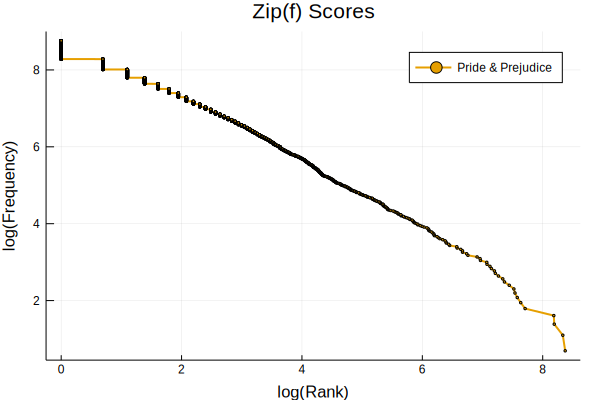

In [70]:
plot(booklogf, booklogr, linewidth=2,
    title="Zip(f) Scores", xlabel = "log(Rank)", marker=1,
    ylabel = "log(Frequency)", label="Pride & Prejudice")

## Chapter Fourteen : Files

In [71]:
println(pwd())
println(abspath("pride.txt"))
println(ispath(abspath("pride.txt")))
println(isdir(pwd()))
println(readdir(pwd()))

/home/alk/Documents/Git/Julia/LearnJulia/data
/home/alk/Documents/Git/Julia/LearnJulia/data/pride.txt
true
true
["ANAGRAMS_DB.jld2", "Buzz.Fuzz", "booyah.jld2", "caption", "iris.csv", "jane_austen.txt", "luxor-drawing-221144_012.svg", "luxor-drawing-221145_597.svg", "luxor-drawing-221146_315.svg", "luxor-drawing-221147_488.svg", "luxor-drawing-221149_016.svg", "luxor-drawing-221150_917.svg", "luxor-drawing-221151_783.svg", "luxor-drawing-221153_125.svg", "luxor-drawing-221156_551.svg", "luxor-drawing-221158_02.svg", "luxor-drawing-221159_588.svg", "luxor-drawing-221223_937.svg", "newwords.txt", "pride.txt", "words (copy).txt", "words.txt"]


a function called walk that “walks” through a directory, prints the names of all the files, and calls itself recursively on all the directories. 

In [72]:
function walk(dirname)
    for name in readdir(dirname)
        path = joinpath(dirname, name)
        if isfile(path)
            println(path)
        else
            walk(path)
        end
    end
end

walk(pwd())

/home/alk/Documents/Git/Julia/LearnJulia/data/ANAGRAMS_DB.jld2
/home/alk/Documents/Git/Julia/LearnJulia/data/Buzz.Fuzz
/home/alk/Documents/Git/Julia/LearnJulia/data/booyah.jld2
/home/alk/Documents/Git/Julia/LearnJulia/data/caption
/home/alk/Documents/Git/Julia/LearnJulia/data/iris.csv
/home/alk/Documents/Git/Julia/LearnJulia/data/jane_austen.txt
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221144_012.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221145_597.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221146_315.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221147_488.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221149_016.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221150_917.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221151_783.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-drawing-221153_125.svg
/home/alk/Documents/Git/Julia/LearnJulia/data/luxor-

In [73]:
# Exceptions
println(open("bad_file"))

SystemError: SystemError: opening file bad_file: No such file or directory

In [74]:
println(open("/etc/passwd", "w"))

SystemError: SystemError: opening file /etc/passwd: Permission denied

In [75]:
try
    fin = open("bad_file.txt")
catch exc
    println("Something went wrong: $exc")
end

Something went wrong: SystemError("opening file bad_file.txt", 2, nothing)


In [76]:
f = open("words.txt")
try
    line = readline(f)
    println(line)
finally
    close(f)
end

aa


In [77]:
# ThinkJulia provides an interface to GDBM (GNU dbm)
# for creating and updating database files.
# The mode "c" means that the database should be created 
# if it doesn’t already exist. The result is a database object 
# that can be used (for most operations) like a dictionary.

db  = DBM("caption", "c")
close(db)

In [78]:
db  = DBM("caption", "n")
db["john"] = "doe"
db["apple"] = "seed"
db["richie"] = "rich"
close(db)

In [79]:
db = DBM("caption", "r")
for (key, value) in db
    println(key, ": ", value)
end
close(db)

apple: seed
richie: rich
john: doe


In [80]:
# A limitation of GDBM is that the keys and the values
# have to be strings or byte arrays. 
# If you try to use any other type, you get an error.

# serialize and deserialize write to and read from a iobuffer
# object which represents an in-memory I/O stream.
# The function take! fetches the contents of the iobuffer
# as a byte array and resets the iobuffer to its initial state.

# In other words, serialization and then deserialization has the
# same effect as copying the object. 

using Serialization

io = IOBuffer();
t = [1,2,3]
println(eltype(t) <: Unsigned)
serialize(io, t)
s = take!(io)
println(eltype(s) <: Unsigned)
t2 = deserialize(IOBuffer(s))
println(eltype(t2) <: Unsigned)

false
true
false


In [81]:
# Command Objects
# The hello is the output of the echo command,
# sent to STDOUT. The run function itself returns a process
# object, and throws an ErrorException if the external command
# fails to run successfully.

cmd = `echo hello`
run(cmd);

hello


In [82]:
# If you want to read the output of the external command,
# read can be used instead
filename = "pride.txt"
cmd = `md5 $filename`
res = read(cmd, String)

"C4881F1339573D47FC2F15612B0AA6E4  pride.txt\n"

Julia introduces modules to create separate variable workspace, i.e. new global scopes.

A module starts with the keyword `module` and ends with `end`. Naming conflicts are avoided between your own top-level definitions and those found in somebody else’s code. `import` allows to control which names from other modules are visible and `export` specifies which of your names are public, i.e. can be used outside the module without being prefixed with the name of the module.

```julia
module LineCount
    export linecount

    function linecount(filename)
        count = 0
        for line in eachline(filename)
            count += 1
        end
        count
    end
end
```

The module `LineCount` object provides `linecount`

```julia
using LineCount
linecount("wc.jl")
```
```output
>11
```

Type this example into a file named wc.jl, include it into the REPL and enter using `LineCount`.

In [86]:
include(joinpath(pwd(),"../src/wc.jl"));
using Main.LineCount;
linecount(joinpath(pwd(),"../src/wc.jl"))

11



Write a function called `sed` that takes as arguments a pattern string, a replacement string, and two filenames; it should read the first file and write the contents into the second file (creating it if necessary). If the pattern string appears anywhere in the file, it should be replaced with the replacement string.

If an error occurs while opening, reading, writing or closing files, your program should catch the exception, print an error message, and exit.


In [87]:
function sed(name1::String, name2::String, pat::Regex, sub::Any)
    @assert isfile(name1) "File does not exist(!)"
    try
        create_handle = open(name2, "w")
        open(name1, "r") do file
            for ln in eachline(file)
                toline  = replace(ln, pat=>sub)
                write(create_handle, toline*"\n")
            end
        end
        close(create_handle)
    catch exc
        println("(!) Error: $exc")
    end
end

sed (generic function with 1 method)

In [88]:
sed("words.txt", "newwords.txt", r"[a-z]", uppercase);
println("$(readline("words.txt")) -> $(readline("newwords.txt"))")

aa -> AA




in `anagrams`, you’ll see that a dictionary is created that maps from a sorted string of letters to the list of words that can be spelled with those letters. For example, "opst" maps to the list ["opts", "post", "pots", "spot", "stop", "tops"].

Write a module that imports `anagramsets` and provides two new functions: `storeanagrams` should store the anagram dictionary using `JLD2`; `readanagrams` should look up a word and return a list of its anagrams.


In [92]:
include(joinpath(pwd(),"../src/anagrams.jl"))
using Main.anagrams
storeanagrams("ANAGRAMS_DB")
readanagrams("boost")

2-element Array{String,1}:
 "boost"
 "boots"

In a large collection of MP3 files, there may be more than one copy of the same song, stored in different directories or with different file names. The goal of this exercise is to search for duplicates.

* Write a program that searches a directory and all of its subdirectories, recursively, and returns a list of complete paths for all files with a given suffix (like .mp3).

* To recognize duplicates, you can use `md5sum` or `md5` to compute a “checksum” for each files. If two files have the same checksum, they probably have the same contents.

* To double-check, you can use the Unix command `diff`

In [93]:
mstring = Regex("\\S*\\/(.*txt)")
m = match(mstring, "/home/alk/Documents/Git/Julia/Base/newwords.txt")
m.captures[1]

"newwords.txt"

In [94]:
function walkdir_ifext(ext::String, dir::String = pwd())
    mstring = Regex("\\S*\\/(.*$ext)")
    for name in readdir(dir)
        path = joinpath(dir, name)
        if isfile(path)
            m = match(mstring, path)
            if typeof(m) != Nothing
                println(path)
            end
        else
            walkdir_ifext(ext, path)
        end
    end
end

walkdir_ifext (generic function with 2 methods)

In [95]:
@time walkdir_ifext("txt", pwd())

/home/alk/Documents/Git/Julia/LearnJulia/data/jane_austen.txt
/home/alk/Documents/Git/Julia/LearnJulia/data/newwords.txt
/home/alk/Documents/Git/Julia/LearnJulia/data/pride.txt
/home/alk/Documents/Git/Julia/LearnJulia/data/words (copy).txt
/home/alk/Documents/Git/Julia/LearnJulia/data/words.txt
  0.009121 seconds (10.04 k allocations: 493.941 KiB)


In [96]:
filename = "pride.txt"
md5string = r"^([A-Z0-9])*[^\s]"
readmd5(path) = match(md5string, read(`md5 $path`, String)).match
readmd5(filename)

"C4881F1339573D47FC2F15612B0AA6E4"

In [97]:
function walk_diff_ext(ext::String, dir::String = pwd())
    mstring = Regex("\\S*\\/(.*$ext)")
    md5string = r"^([A-Z0-9])*[^\s]"
    @inline readmd5(path)::String = string(match(md5string, read(`md5 $path`, String)).match)
    md5book = Dict{String, String}()
    for name in readdir(dir)
        path = joinpath(dir, name)
        if isfile(path)
            m = match(mstring, path)
            filehash = readmd5(path)
            if typeof(m) != Nothing
                filename = m.captures[1]
                if haskey(md5book, filehash)
                    println("'$filename' and '$(md5book[filehash])' are duplicates (!)")
                    print("\t\tChecking files with `diff`..")
                    unixdiff = read(`diff -w $filename $(md5book[filehash])`, String)
                    if isempty(unixdiff)
                        println(" Diff is empty, files are duplicates (!)")
                    end
                else
                    md5book[filehash] = filename
                    println("found file '$filename'")
                end
            end
        else
            walkdir_ifext(ext, path)
        end
    end
end

walk_diff_ext (generic function with 2 methods)

In [98]:
@time walk_diff_ext("txt", pwd())

found file 'jane_austen.txt'
found file 'newwords.txt'
found file 'pride.txt'
found file 'words (copy).txt'
'words.txt' and 'words (copy).txt' are duplicates (!)
		Checking files with `diff`.. Diff is empty, files are duplicates (!)
  0.125977 seconds (145.70 k allocations: 11.350 MiB, 7.80% gc time)


## Chapter Fifteen : Structs and Objects

Write a function called `distancebetweenpoints` that takes two points as arguments and returns the distance between them. 

In [100]:
struct Point{T <: Number}
    x::T
    y::T
end

mutable struct MPoint{T <: Number}
    x::T
    y::T
end

In [101]:
import Base: promote_rule, convert
# both become mutable /  mutability has higher priority
promote_rule(::Type{Point}, ::Type{MPoint}) = MPoint

# arguments promotion, outer constructors
Point(x::Number, y::Number) = Point(promote(x,y)...)
MPoint(x::Number, y::Number) = MPoint(promote(x,y)...)

MPoint

In [102]:
#InterConversion
convert(::Type{Point}, t::MPoint) = Point(t.x, t.y)
convert(::Type{MPoint}, t::Point) = MPoint(t.x, t.y)

#Explicit Inter+Type Conversion
convert(::Type{Point{T}}, t::MPoint{S}) where{S<:Number, T<:Number} = Point(T(t.x), T(t.y))
convert(::Type{MPoint{T}}, t::Point{S}) where{S<:Number, T<:Number} = MPoint(T(t.x), T(t.y))

#TypeConversion
convert(::Type{MPoint{T}}, t::MPoint{S}) where{S<:Number, T<:Number} = MPoint(T(t.x), T(t.y))
convert(::Type{Point{T}}, t::Point{S}) where{S<:Number, T<:Number} = Point(T(t.x), T(t.y))

convert (generic function with 253 methods)

In [103]:
#test
println(convert(Point{ComplexF64}, Point(1, 2)))
println(convert(Point{Int64}, Point(1, 2)))
println(Point{Int}(1,2))
println(Point{ComplexF64}(1, 2.5))

Point{Complex{Float64}}(1.0 + 0.0im, 2.0 + 0.0im)
Point{Int64}(1, 2)
Point{Int64}(1, 2)
Point{Complex{Float64}}(1.0 + 0.0im, 2.5 + 0.0im)


In [104]:
a, b = Point(1,2), Point(-2, 1)

(Point{Int64}(1, 2), Point{Int64}(-2, 1))

In [105]:
Base.:length(p::Point) = 2
Base.:length(p::MPoint) = 2

Base.:eltype(p::Point) = typeof(p.x)
Base.:eltype(p::MPoint) = typeof(p.x)

Base.:iterate(p::Point, state = 1) = state > 2 ? nothing : (getfield(p, state), state + 1)
Base.:iterate(p::MPoint, state = 1) = state > 2 ? nothing : (getfield(p, state), state + 1)

In [106]:
println(length(Point{ComplexF64}(1,1)),",",length(MPoint{ComplexF64}(1,1)))
println(eltype(Point{ComplexF64}(1,1)),",",eltype(MPoint{ComplexF64}(1,1)))
println([x for x in (Point{Int64}(1,1))],",",[x for x in (MPoint{Int64}(1,1))])

2,2
Complex{Float64},Complex{Float64}
[1, 1],[1, 1]


In [107]:
Base.:+(a::Point, b::Point) = Point(a.x+b.x, a.y+b.y)
Base.:-(a::Point, b::Point) = Point(a.x-b.x, a.y-b.y)
Base.:abs(a::Point) = Point(abs(a.x), abs(a.y))
Base.:^(a::Point, b::Number) = Point(a.x^b, a.y^b)

Base.:+(a::MPoint, b::MPoint) = MPoint(a.x+b.x, a.y+b.y)
Base.:-(a::MPoint, b::MPoint) = MPoint(a.x-b.x, a.y-b.y)
Base.:abs(a::MPoint) = MPoint(abs(a.x), abs(a.y))
Base.:^(a::MPoint, b::Number) = MPoint(a.x^b, a.y^b)

In [108]:
#test
@time Point(collect(sum(x) for x in zip(a,b))...)
@time a+b
println("$(a+b),\n$(a-b),\n$(abs(b)),\n$(b^(1.33+1.33im))")

  0.029949 seconds (113.00 k allocations: 5.624 MiB)
  0.004595 seconds (4.23 k allocations: 234.024 KiB)
Point{Int64}(-1, 3),
Point{Int64}(3, 1),
Point{Int64}(2, 1),
Point{Complex{Float64}}(0.01456909220509047 - 0.035664589524949775im, 1.0 + 0.0im)


In [109]:
function manhattan(a::Point, b::Point)
    ret::Point = abs(a-b)
    return ret.x + ret.y
end

function euclidean(a::Point, b::Point)
    ret::Point = (a-b)^2
    return sqrt(ret.x + ret.y)
end

euclidean (generic function with 1 method)

In [110]:
#test
manhattan(Point(1, 2), Point(5, 5)) == 7, euclidean(Point(1, 2), Point(5, 5)) == 5.0

(true, true)

In [111]:
function distancebetweenpoints(a::Point, b::Point)
    println("Manhattan:($(manhattan(a,b))), Euclidean:($(euclidean(a,b)))")
end

distancebetweenpoints (generic function with 1 method)

In [112]:
@time distancebetweenpoints(a, b)

Manhattan:(4), Euclidean:(3.1622776601683795)
  0.011050 seconds (34.15 k allocations: 1.688 MiB)


Create a `Point` instance, make a copy of it and check the equivalence and the `egality` of both. The result can surprise you but it explains why aliasing is a non issue for an immutable object.

In [113]:
#IMMUTABLE
p1 = Point(1,1)
p2 = deepcopy(p1)
p3 = deepcopy(p2)

println("Same Object? $(p1≡p2≡p3)")
println("Same Data? $(p1==p2==p3)")

Same Object? true
Same Data? true


You will be disappointed to learn that for mutable objects, the default behavior of the `==` operator is the same as the `===` operator; **it checks object identity, not object equivalence.** That’s because for mutable composite types, Julia doesn’t know what should be considered equivalent. At least, not yet. 

In [114]:
#MUTABLE
p1 = MPoint(1,1)
p2 = deepcopy(p1)
p3 = deepcopy(p2)

println("Same Object? $(p1≡p2), $(p2≡p3), $(p1≡p3), $(p1≡p2≡p3)")
println("Same Data? $(p1==p2), $(p2==p3), $(p1==p3), $(p1==p2==p3)")

Same Object? false, false, false, false
Same Data? false, false, false, false


1. Write a definition for a type named `Circle` with fields center and radius, where center is a `point` object and `radius` is a number.

2. Instantiate a `circle` object that represents a circle with its `center` at `(150,100)` and `radius` `75`.

3. Write a function named `pointincircle` that takes a `circle` object and a `point` object and returns true if the `point` lies in or on the boundary of the `circle`.

4. Write a function named `rectincircle` that takes a `circle` object and a `rectangle` object and returns true if the `rectangle` lies entirely in or on the boundary of the `circle`.

5. Write a function named `rectcircleoverlap` that takes a `circle` object and a `rectangle` object and returns `true` if any of the corners of the rectangle fall inside the circle. Or as a more challenging version, return `true` if any part of the `rectangle` falls inside the `circle`.


In [115]:
struct Circle{T<:Real}
    center::Point{T}
    radius::T
end

struct Rectangle{T<:Real}
    width::T
    height::T
    corner::Point{T}
end

function Circle(CEN::Tuple{<:Real, <:Real}, RAD::Real)::Circle{<:Real}
    ARGS = promote(CEN...,RAD)
    return Circle{<:Real}(Point(ARGS[1:2]...), ARGS[end])
end

function Rectangle(W::Real, H::Real, C::Tuple{<:Real, <:Real})::Rectangle{<:Real}
    ARGS = promote(W,H,C...)
    return Rectangle{<:Real}(ARGS[1], ARGS[2], Point(ARGS[end-1:end]...))
end

Rectangle

In [116]:
println(Circle((150.0, 100.0), 75))
println(Rectangle(4, 2, (1.0, 1.0)))

Circle{Float64}(Point{Float64}(150.0, 100.0), 75.0)
Rectangle{Float64}(4.0, 2.0, Point{Float64}(1.0, 1.0))


In [117]:
function pointincircle(p::Point{<:Real}, c::Circle{<:Real})::Bool
    return euclidean(p, c.center) <= c.radius
end

pointincircle (generic function with 1 method)

In [118]:
println(pointincircle(Point(3.5,3.5), Circle((0.0, 0.0), 5)))
println(pointincircle(Point(3.6,3.5), Circle((0.0, 0.0), 5)))

true
false


In [119]:
struct RecWpts{T<:Real}
    p1::Point{T}
    p2::Point{T}
    p3::Point{T}
    p4::Point{T}
end

function RecWpts(r::Rectangle{<:Real})
        p1::Point{<:Real} = Point(0,0) + r.corner
        p2::Point{<:Real} = Point(r.width,0) + r.corner
        p3::Point{<:Real} = Point(r.width, r.height) + r.corner
        p4::Point{<:Real} = Point(0, r.height) + r.corner
        return RecWpts{<:Real}(p1, p2, p3, p4)
end

RecWpts

In [120]:
Base.:length(rwp::RecWpts) = 4
Base.:eltype(rwp::RecWpts) = typeof(rwp.p1.x)
Base.:iterate(rwp::RecWpts, state = 1) = state > 4 ? nothing : (getfield(rwp, state), state + 1)

In [121]:
println(typeof(RecWpts(Rectangle(4, 2, (1.0, 1.0)))))
println(eltype(RecWpts(Rectangle(4, 2, (1.0, 1.0)))))
println(length(RecWpts(Rectangle(4, 2, (1.0, 1.0)))))
p1, p2, p3, p4 = RecWpts(Rectangle(4, 2, (1.0, 1.0)));
println(p1,", ",typeof(p1))

RecWpts{Float64}
Float64
4
Point{Float64}(1.0, 1.0), Point{Float64}


In [122]:
function rectincircle(r::Rectangle{<:Real}, c::Circle{<:Real})::Bool
    for pt in RecWpts(r)
        if !pointincircle(pt, c)
            return false
        end
    end
    return true
end

rectincircle (generic function with 1 method)

In [123]:
@time rectincircle(Rectangle(4, 2, (1.0, 1.0)), Circle((0, 0),5))
println(rectincircle(Rectangle(3.6, 3.6, (0.0, 0.0)), Circle((0, 0),5)))
println(rectincircle(Rectangle(2, 2, (0.0, 0.0)), Circle((0, 0),5)))

  0.041615 seconds (63.55 k allocations: 3.215 MiB, 21.45% gc time)
false
true


In [124]:
function rectcircleoverlap(r::Rectangle{<:Real}, c::Circle{<:Real})::Bool
    for pt in RecWpts(r)
        if pointincircle(pt, c)
            return true
        end
    end
    return false
end

rectcircleoverlap (generic function with 1 method)

In [125]:
@time rectcircleoverlap(Rectangle(4, 2, (1.0, 1.0)), Circle((0, 0),5))
println(rectcircleoverlap(Rectangle(3.6, 3.6, (0.0, 0.0)), Circle((0, 0),5)))
println(rectcircleoverlap(Rectangle(-1, -1, (-3.6, -3.6)), Circle((0, 0),5)))

  0.009410 seconds (8.07 k allocations: 386.632 KiB)
true
false


1. Write a function called `drawrect` that takes a `turtle` object and a `rectangle` object and uses the turtle to draw the rectangle.

2. Write a function called `drawcircle` that takes a `turtle` object and a `circle` object and draws the circle.

In [126]:
function drawrect(t::Turtle, r::Rectangle)
    t.xpos, t.ypos = [1,-1].*r.corner
    @svg begin
        forward(t, r.width)
        turn(t, -90)
        forward(t, r.height)
        turn(t, -90)
        forward(t, r.width)
        turn(t, -90)
        forward(t, r.height)
    end
end

drawrect (generic function with 1 method)

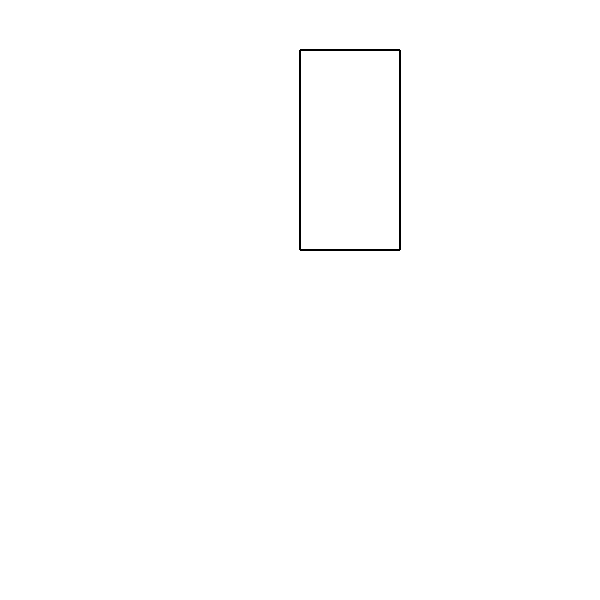

In [127]:
🐢 = Turtle()
drawrect(🐢, Rectangle(100, 200, (0,50)))

In [128]:
function drawcircle(t::Turtle, c::Circle)
    c_shift = 10
    t.xpos, t.ypos = [1,-1].*(c.center + Point(-c_shift, -c.radius))
    @svg begin
        for i in 1:36
            forward(t, (2*pi*c.radius)/36)
            turn(t, -10)
        end
    end
end

drawcircle (generic function with 1 method)

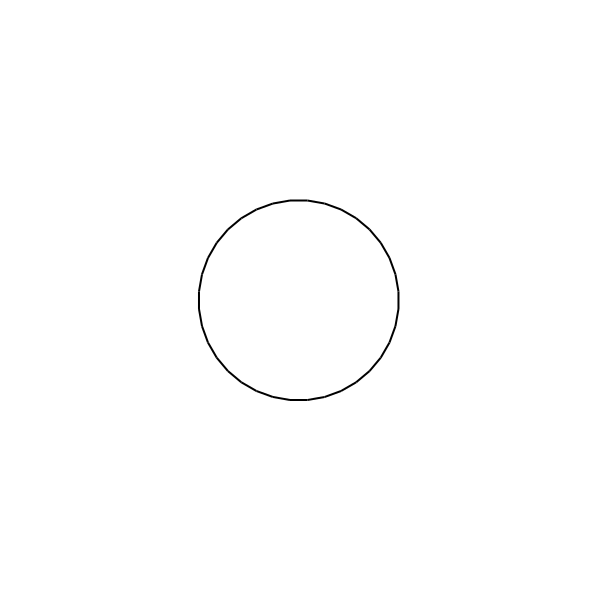

In [129]:
🐢 = Turtle()
drawcircle(🐢, Circle((0,0),100))

A little extra

In [130]:
function drawbothcnr(t::Turtle, c::Circle, r::Rectangle)
    @svg begin
        c_shift = 10
        t.pencolor = (0.0,0.0,1.0)
        t.xpos, t.ypos = [1,-1].*(c.center + Point(-c_shift, -c.radius))
        for i in 1:36
            forward(t, (2*pi*c.radius)/36)
            turn(t, -10)
        end
        # red if overlaps green otherwise
        t.pencolor = rectcircleoverlap(r, c) ? (1.0,0.0,0.0) : (0.0,1.0,0.0)
        t.xpos, t.ypos = [1,-1].*r.corner
        forward(t, r.width)
        turn(t, -90)
        forward(t, r.height)
        turn(t, -90)
        forward(t, r.width)
        turn(t, -90)
        forward(t, r.height)
    end
end

drawbothcnr (generic function with 1 method)

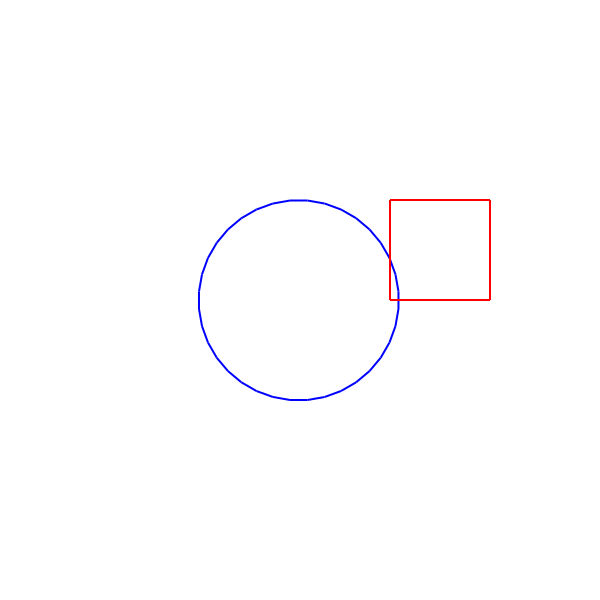

In [131]:
# With Collision
🐢 = Turtle()
drawbothcnr(🐢, Circle((0,0),100), Rectangle(100, 100, (90,0)))

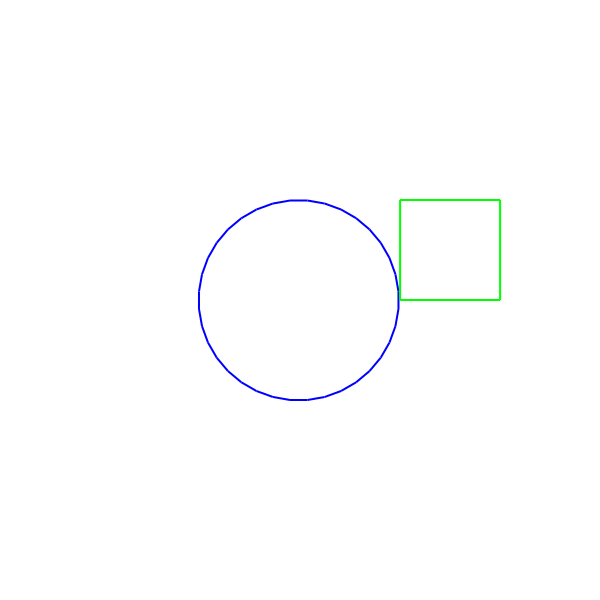

In [132]:
# No Collision
🐢 = Turtle()
drawbothcnr(🐢, Circle((0,0),100), Rectangle(100, 100, (100.1,0)))

## Chapter Sixteen : Structs and Functions

Write a function called `printtime` that takes a `mytime` object and prints it in the form `hour:minute:second`. The `@printf` macro of the `StdLib` module `Printf` prints an integer with the format sequence `%02d `using at least two digits, including a leading zero if necessary. 

In [133]:
mutable struct mytime{T<:Int64}
    hour::T
    minute::T
    second::T
    @inline function mytime(hh::Real, min::Real, sec::Real)::mytime{Int64}
        addtohh, addtomin, hours, minutes, seconds = 0,0,0,0,0
        #remove fractionals for hours and minutes
        if any([!(typeof(x)<:Signed) for x in [hh, min, sec]])
            #println("fractional time",",",typeof(hh),",",typeof(min),",",typeof(sec))
            frachour, fracmin = 0.0, 0.0
            hh, frachour = divrem(hh, 1.0)
            min, fracmin = divrem(min+frachour*60, 1.0)
            sec = sec + fracmin*60
        end
        #remove out of bounds values for minutes and seconds
        addtomin, seconds = divrem(sec, 60)
        seconds = round(Int128, seconds)
        addtohh, minutes = divrem(min+addtomin, 60)
        minutes = round(Int128, minutes)
        hours = round(Int128, addtohh+hh)
        new{Int64}(hours, minutes, seconds)
    end
end

In [134]:
#test
@time mytime(1.2, 3.2, 3606)
@time mytime(1, 3, 3606)

  0.089685 seconds (198.92 k allocations: 9.520 MiB, 8.86% gc time)
  0.055611 seconds (126.17 k allocations: 5.955 MiB)


mytime{Int64}(2, 3, 6)

In [135]:
#methods
@inline Base.:length(t::mytime)::Int64 = 3
@inline Base.:eltype(t::mytime)::Type = Int128
@inline Base.:iterate(t::mytime, state = 1)::mytime = state > 3 ? nothing : (getfield(t, state), state + 1)
@inline Base.:+(t::mytime, tt::mytime)::mytime = mytime(t.hour+tt.hour, t.minute+tt.minute, t.second+tt.second)
@inline Base.:-(t::mytime, tt::mytime)::mytime = mytime(t.hour-tt.hour, t.minute-tt.minute, t.second-tt.second)
Base.:repr(t::mytime)::String = @sprintf("%02d:%02d:%02d",t.hour, t.minute, t.second)
Base.:show(io::IO, t::mytime) = print(io, @sprintf("%02d:%02d:%02d",t.hour, t.minute, t.second))

In [136]:
t0 = mytime(2.1, 199.2, 9989.3)
println(t0)

08:11:41


In [137]:
@inline Base.:isless(t1::mytime, t2::mytime)::Bool = (((t1.hour*60+t1.minute)*60+t1.second) < ((t2.hour*60+t2.minute)*60+t2.second))
@inline Base.:(==)(t1::mytime, t2::mytime)::Bool = (((t1.hour*60+t1.minute)*60+t1.second) == ((t2.hour*60+t2.minute)*60+t2.second))
# Base.:isequal(t1::mytime, t2::mytime)::Bool = (((t1.hour*60+t1.minute)*60+t1.second) == ((t2.hour*60+t2.minute)*60+t2.second))

Write a boolean function called `isafter` that takes two `mytime` objects, `t1` and `t2`, and returns `true` if `t1` follows `t2` chronologically and `false` otherwise. 
>Challenge: don’t use an if statement. 

In [138]:
isafter(t1::mytime, t2::mytime)::Bool = t1 > t2

isafter (generic function with 1 method)

In [139]:
t1 = mytime(1,15,53)
t2 = mytime(1,15,52)
t3 = mytime(1,15,51)

println("$(isafter(t1, t2)), $(isafter(t1, t3)), $(isafter(t2, t1)), $(isafter(t2, t3)), $(isafter(t3, t2)), $(isafter(t3, t1))")

true, true, false, true, false, false


Sometimes it is useful for a function to modify the objects it gets as parameters. In that case, the changes are visible to the caller. Functions that work this way are called `modifiers`.

`increment!`, which adds a given number of seconds to a `mytime` object, can be written naturally as a modifier.

Write a correct version of `increment!` that doesn’t contain any loops.

In [140]:
increment!(t::mytime, seconds::Int)::mytime = mytime(t.hour, t.minute, t.second+seconds)

increment! (generic function with 1 method)

In [141]:
println(t1)
println(increment!(t1, 3601))

01:15:53
02:15:54


Write a “pure” version of `increment` that creates and returns a new mytime object rather than modifying the parameter.
> the version above is already pure, plus the struct `mytime` is immutable

Rewrite `increment!` using `timetoint` and `inttotime`.

`timetoint` takes mytime and returns values in seconds
`inttotime` takes seconds and returns a mytime object

In [142]:
timetoint(t::mytime)::Int64 = (t.hour*60+t.minute)*60+t.second
inttotime(t::Real)::mytime = mytime(0, 0, t)

inttotime (generic function with 1 method)

In [143]:
@time timetoint(t1)
@time inttotime(4553) == t1

  0.003764 seconds (4.71 k allocations: 260.717 KiB)
  0.062871 seconds (132.28 k allocations: 6.077 MiB, 11.55% gc time)


true

In [144]:
alt_increment!(t::mytime, by::Real) = inttotime(timetoint(t)+by)

alt_increment! (generic function with 1 method)

In [145]:
println(t1)
println(alt_increment!(t1, 3601))

01:15:53
02:15:54


Write a function called `multime` that takes a `mytime` object and a number and returns a new `mytime` object that contains the product of the original `mytime` and the number.

Then use `multime` to write a function that takes a `mytime` object that represents the finishing time in a race, and a number that represents the distance, and returns a `mytime` object that represents the average pace (time per mile).


In [146]:
@inline Base.:*(t::mytime, by::Real)::mytime = mytime(t.hour*by, t.minute*by, t.second*by)
@inline Base.:/(t::mytime, by::Real)::mytime = mytime(t.hour/by, t.minute/by, t.second/by)

An alternative approach would be to do it like this, but since we don't have to worry about `BASE60` underflows and overflows the methods above will work just as fine, as the `constructor` we defined already deals with these issues. (⌐■_■)
```julia
Base.:*(t::mytime, by::Real)::mytime = mytime(0, 0,((t.hour*60+t.minute)*60+t.second)*by)
Base.:/(t::mytime, by::Real)::mytime = mytime(0, 0,((t.hour*60+t.minute)*60+t.second)/by)
```

In [147]:
#test
t4 = mytime(1,2,16)
by = 2
println("$(t4) -> *$by $(t4*by)")
println("$(t4) -> /$by $(t4/by)")
timetoint(t4), timetoint(t4)*by , timetoint(t4*by), timetoint(t4/by), timetoint(t4)/by

01:02:16 -> *2 02:04:32
01:02:16 -> /2 00:31:08


(3736, 7472, 7472, 1868, 1868.0)

In [148]:
multime(t::mytime, by::Real)::mytime = t*by
pacing(t::mytime, milestogo::Real)::mytime = multime(t, 1/milestogo)
@inline printpacing(t::mytime, togo::Real)::String = @sprintf("Total Time: %s, Total Distance: %s, Time/Mile: %s.",t,togo,pacing(t, togo))

printpacing (generic function with 1 method)

In [149]:
#test
@time timetoint(multime(t4, by)) == round(Int, timetoint(t4)*by) == timetoint(t4*by)
@time printpacing(mytime(0,0,3600), 10)

  0.042029 seconds (44.13 k allocations: 1.754 MiB)
  0.040003 seconds (121.39 k allocations: 5.427 MiB)


"Total Time: 01:00:00, Total Distance: 10, Time/Mile: 00:06:00."

Julia provides time objects that are similar to the `mytime` objects in this chapter, but they provide a rich set of function and operators. Read the documentation at https://docs.julialang.org/en/stable/stdlib/Dates/.

1. Write a program that gets the current date and prints the day of the week.

2. Write a program that takes a birthday as input and prints the user’s age and the number of days, hours, minutes and seconds until their next birthday.

3. For two people born on different days, there is a day when one is twice as old as the other. That’s their Double Day. Write a program that takes two birthdays and computes their Double Day.

4. For a little more challenge, write the more general version that computes the day when one person is n times older than the other.

In [150]:
using Dates
GetDateWDay()::Tuple{Date, String} = today(), Dates.dayname(today())

GetDateWDay (generic function with 1 method)

In [151]:
#test
@time GetDateWDay()

  0.028535 seconds (60.31 k allocations: 2.917 MiB)


(2019-02-19, "Tuesday")

In [152]:
function timetonextbday(dates...)
    try
        bt = Dates.Date(dates...)
        today = Dates.today()
        period = Dates.Year(1)
        age = Dates.Year(bt + (floor(today, period) - ceil(bt, period))) - Dates.Year(bt)
        # add one more year if date has already passed the current year
        when = (bt + age + period) < Dates.today() ? bt + age + period*2 : bt + age + period
        remtime = Dates.canonicalize(Dates.CompoundPeriod(Dates.DateTime(when) - now()))
        return age, remtime
    catch exc
        println(exc)
    end
end

printtimetobday(dates...) = @printf("Age: %s,\nTime to next birthday: %s\n", timetonextbday(dates...)...)

printtimetobday (generic function with 1 method)

In [153]:
#test
@time timetonextbday(2001,9,11);
@time printtimetobday(2011,1,15)

  0.305438 seconds (393.88 k allocations: 19.836 MiB, 2.64% gc time)
Age: 7 years,
Time to next birthday: 47 weeks, 1 hour, 29 minutes, 54 seconds, 374 milliseconds
  0.070982 seconds (150.81 k allocations: 7.589 MiB, 11.75% gc time)


In [154]:
function nday(a::Tuple{Int, Int, Int}, b::Tuple{Int, Int, Int}, n::Int)::Date
    try
        ad, bd = Dates.Date(a...), Dates.Date(b...)
        NΔ = n * abs(ad-bd)
        nthday = ad < bd ? NΔ + ad : NΔ + bd
        return nthday
    catch exc
        println(exc)
    end
end

nday (generic function with 1 method)

In [155]:
@time nday((2001,7,18),(2011,7,18),2)

  0.008503 seconds (15.09 k allocations: 758.499 KiB)


2021-07-17

## Chapter Seventeen : Multiple Dispatch

Rewrite `timetoint` and `inttotime` (from Prototyping Versus Planning) to specify their argument.

* From Chapter 16
```julia
timetoint(t::mytime)::Int128 = (t.hour*60+t.minute)*60+t.second
inttotime(t::Real)::mytime = mytime(0, 0, t)
```

Constructors
* Creates an object, can be defined inside and/or outside structs.
* An inner constructor method is always declared inside the block of a type declaration and it has access to a function called new that creates objects of the newly declared type.
* We can also add our own outer constructor methods, this is also called as a copy constructor because the new object is a copy.
* To enforce invariants, we need inner constructor methods
```julia
mutable struct MyTime
    hour :: Int64
    minute :: Int64
    second :: Int64
    function MyTime(hour::Int64=0, minute::Int64=0, second::Int64=0)
        @assert(0 ≤ minute < 60, "Minute is between 0 and 60.")
        @assert(0 ≤ second < 60, "Second is between 0 and 60.")
        new(hour, minute, second)
    end
end
```
the struct `mytime` now has 6 methods:
```julia
MyTime()
MyTime(hour::Int64)
MyTime(hour::Int64, minute::Int64)
MyTime(hour::Int64, minute::Int64, second::Int64)
MyTime(hour::Int64, minute::Int64, second::Int64)
MyTime(time::MyTime)
```
* **The default constructor is not available if any inner constructor is defined. You have to write explicitely all the inner constructors you need.**

Write an inner constructor method for the `Point` class that takes `x` and `y` as optional parameters and assigns them to the corresponding fields. 


In [156]:
struct rePoint
    x
    y
    function rePoint(x::Real=0, y::Real=0)
        new(x, y)
    end
end
println(methods(rePoint))

# 3 methods for generic function "(::Type)":
[1] rePoint() in Main at In[156]:5
[2] rePoint(x::Real) in Main at In[156]:5
[3] rePoint(x::Real, y::Real) in Main at In[156]:5


**Operator Overloading**</p>
By defining operator methods, you can specify the behavior of operators on programmer-defined types. For example, if you define a method named `+` with two `MyTime` arguments, you can use the `+` operator on `mytime `objects.

Here's one way to do it, 

```julia
import Base.+

function +(t1::MyTime, t2::MyTime)
    seconds = timetoint(t1) + timetoint(t2)
    inttotime(seconds)
end
```

Write `+` methods for `point` objects:

* If both operands are point objects, the method should return a new point object whose `x` coordinate is the sum of the `x` coordinates of the operands, and likewise for the `y` coordinates.

* If the first or the second operand is a tuple, the method should add the first element of the tuple to the `x` coordinate and the second element to the `y` coordinate, and return a new `point` object with the result.

In [157]:
Base.:+(a::rePoint, b::rePoint)::rePoint = rePoint(a.x+b.x, a.y+b.y)
# for tuple args
Base.:+(a::rePoint, b::Tuple{Int, Int})::rePoint = rePoint(a.x+b[1], a.y+b[2])
Base.:+(a::Tuple{Int, Int}, b::rePoint)::rePoint = rePoint(a[1]+b.x, a[2]+b.y)

In [158]:
#test
println(rePoint(1,1) + rePoint(2,3))
println((1,1) + rePoint(2,3))
println(rePoint(1,1) + (2,3))

rePoint(3, 4)
rePoint(3, 4)
rePoint(3, 4)


Change the fields of `MyTime` to be a single integer representing seconds since midnight. Then modify the methods `timetoint`, `isafter`, and `+` defined in this chapter to work with the new implementation.

In [159]:
struct midnighttime
    seconds::Int
    function midnighttime(seconds::Int)
        seconds = seconds % (24*3600)
        new(round(Int, seconds))
    end
end

In [160]:
midnighttime(24*3600)

midnighttime(0)

In [161]:
Base.:+(a::midnighttime, b::midnighttime)::midnighttime = midnighttime(a.seconds + b.seconds)
Base.:(==)(a::midnighttime, b::midnighttime)::midnighttime = a.seconds == b.seconds
Base.:isless(a::midnighttime, b::midnighttime)::Bool = a.seconds < b.seconds
timetoint(a::midnighttime)::Int = a.seconds
isafter(a::midnighttime, b::midnighttime)::Bool = a > b

isafter (generic function with 2 methods)

In [162]:
#test
println(timetoint(midnighttime(3600) + midnighttime(3600)))
println(isafter(midnighttime(3600), midnighttime(2400)))

7200
true


Write a definition for a type named 'Kangaroo' with a field named 'pouchcontents' of type 'Array' and the following methods:

* A constructor that initializes `pouchcontents` to an empty array.

* A method named `putinpouch` that takes a Kangaroo object and an object of any type and adds it to `pouchcontents`.

* A `show` method that returns a string representation of the Kangaroo object and the contents of the pouch.

Test your code by creating two Kangaroo objects, assigning them to variables named `kanga` and `roo`, and then adding `roo` to the contents of `kanga`’s pouch.


In [163]:
mutable struct Kangaroo
    pouchcontents::Vector{Any}
    Kangaroo() = new([])
end

putinpouch(whatever::Any, k::Kangaroo) = push!(k.pouchcontents, whatever)
Base.:show(io::IO, k::Kangaroo) = print(io, join([@sprintf("[Type:%s->Value:[%s]],\n",typeof(x),x) for x in (k.pouchcontents)]))

In [164]:
#test
kanga = Kangaroo()
roo = Kangaroo()
putinpouch(roo,kanga)
putinpouch(roo,kanga)
show(kanga)

[Type:Kangaroo->Value:[]],
[Type:Kangaroo->Value:[]],


## Chapter Eighteen : SubTyping

Write a `isless` method for `mytime` objects. You can use tuple comparison, but you also might consider comparing integers.

```julia
Base.:isless(t1::mytime, t2::mytime)::Bool = (((t1.hour*60+t1.minute)*60+t1.second) < ((t2.hour*60+t2.minute)*60+t2.second))
```

Write a function named `sort!` that uses the function `sort!` to sort the cards in a `Deck`.` sort!` uses the `isless` method we defined to determine the order. 

In [258]:
const suit_names = ["♣", "♦", "♥", "♠"]
const rank_names = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]

struct Card{Int64}
    suit::Int64
    rank::Int64
    function Card(suit::Int64, rank::Int64)
        @assert(1 ≤ suit ≤ 4, "suit is between 1 and 4")
        @assert(1 ≤ rank ≤ 13, "rank is between 1 and 13")
        new{Int64}(suit, rank)
    end
end

Base.:show(io::IO, card::Card) = print(io, @sprintf("%s%s",rank_names[card.rank],suit_names[card.suit]))

In [166]:
Card(3,11)

J♥

In [259]:
Base.:(==)(a::Card, b::Card)::Bool = isequal((a.rank,b.rank),(a.suit,b.suit))
Base.:isless(a::Card, b::Card)::Bool = isless((a.suit, a.rank),(b.suit, b.rank))

In [169]:
println(Card(1,11) < Card(1,10))
println(Card(1,11) < Card(2,11))

false
true


In [260]:
using Random

struct FullDeck
    cards::Vector{Card{Int64}}
    function FullDeck(v::Vector{Card{Int64}})
        @assert length(Set(v)) == 52 "(╯°□°）╯︵ ┻━┻, A Full deck must have 52 Unique Cards!, $(length(Set(v)))"
        new(v)
    end
end

function FullDeck()::FullDeck
        ranks = Set(collect(1:4))
        suits = Set(collect(1:13))
        FullDeck([Card(i,j) for i in ranks for j in suits])
    end

sortdeck!(d::FullDeck)::FullDeck = FullDeck(sort!(d.cards))
                
function Base.:show(io::IO, d::FullDeck)
    seq = []
    for i in 1:13
        push!(seq, @sprintf("%s\t", d.cards[i]))
        push!(seq, @sprintf("%s\t", d.cards[i+13]))
        push!(seq, @sprintf("%s\t", d.cards[i+26]))
        push!(seq, @sprintf("%s\t", d.cards[i+39]))
        push!(seq, @sprintf("\n"))
    end
    print(io, join(seq))
end

In [173]:
#test
d = FullDeck();
show(d)
println("\n",sortdeck!(d))

2♠	2♦	2♥	2♣	
J♠	J♦	J♥	J♣	
7♠	7♦	7♥	7♣	
9♠	9♦	9♥	9♣	
10♠	10♦	10♥	10♣	
8♠	8♦	8♥	8♣	
6♠	6♦	6♥	6♣	
4♠	4♦	4♥	4♣	
3♠	3♦	3♥	3♣	
5♠	5♦	5♥	5♣	
K♠	K♦	K♥	K♣	
Q♠	Q♦	Q♥	Q♣	
A♠	A♦	A♥	A♣	

A♣	A♦	A♥	A♠	
2♣	2♦	2♥	2♠	
3♣	3♦	3♥	3♠	
4♣	4♦	4♥	4♠	
5♣	5♦	5♥	5♠	
6♣	6♦	6♥	6♠	
7♣	7♦	7♥	7♠	
8♣	8♦	8♥	8♠	
9♣	9♦	9♥	9♠	
10♣	10♦	10♥	10♠	
J♣	J♦	J♥	J♠	
Q♣	Q♦	Q♥	Q♠	
K♣	K♦	K♥	K♠	



Here’s a design suggestion: when you override a method, the interface of the new method should be the same as the old. It should take the same parameters, return the same type, and obey the same preconditions and postconditions. If you follow this rule, you will find that any function designed to work with an instance of a supertype, like an CardSet, will also work with instances of its subtypes Deck and Hand.

If you violate this rule, which is called the “Liskov substitution principle”, your code will collapse like (sorry) a house of cards.

Some suggestions for development plans for designing types:

* Start by writing functions that read and write global variables (when necessary).

* Once you get the program working, look for associations between global variables and the functions that use them.

* Encapsulate related variables as fields of a struct.

* Transform the associated functions into methods with as argument objects of the new type.

Follow the steps described above to encapsulate the global variables as attributes of a new struct called `Markov`.

**Now we will refactor our previous Markovian generator to use structs.**

In [178]:
struct Mbasewords{T<:Int64}
    iwords::Vector{T}
    iwmap::Dict{String, T}
    wimap::Dict{T, String}
end

@inline getstring(x::String)::Vector{String} = collect(l.match for l in eachmatch(r"dr\.|mrs?\.|ms\.|[a-z']+|[,?!.]",x))

@inline function Mbasewords(filename::String)::Mbasewords{Int64}
    seq::Vector{String} = []
    open(filename, "r") do io
        append!(seq, getstring(lowercase(read(io, String))))
    end
    wimap = Dict{Int64, String}(enumerate(Set(seq)))
    iwmap = Dict{String, Int64}(kv[2]=>kv[1] for kv in wimap)
    iwords = Vector{Int64}([iwmap[x] for x in seq])
    Mbasewords{Int64}(iwords, iwmap, wimap)
end

Mbasewords

In [179]:
@time rb = Mbasewords("pride.txt");

  0.170651 seconds (932.83 k allocations: 58.956 MiB, 15.61% gc time)


In [180]:
struct Markov{Int64}
    order :: Int64
    suffixes :: Dict{Tuple{Int64, Vararg{Int64}}, Array{Int64, 1}}
    prefix :: Array{Int64, 1}
    function Markov(order::Int64=2)
        new{Int64}(order, Dict{Tuple{Int64, Vararg{Int64}}, Array{Int64, 1}}(), Array{Int64, 1}())
    end
end

@inline function processword(markov::Markov{T}, word::T) where{T<:Int64}
    if length(markov.prefix) < markov.order
        push!(markov.prefix, word)
        return
    end
    get!(markov.suffixes, (markov.prefix...,), Vector{T}())
    push!(markov.suffixes[(markov.prefix...,)], word)
    popfirst!(markov.prefix)
    push!(markov.prefix, word)
end

@inline function seq2markov(m::Markov{Int}, seq::Mbasewords)
    for w in seq.iwords
        processword(m, w)
    end
end

seq2markov (generic function with 1 method)

In [181]:
mm = Markov();
@time seq2markov(mm, rb);

  0.321339 seconds (1.95 M allocations: 71.683 MiB, 11.21% gc time)


In [182]:
struct Prose
    order :: Int64
    prefix :: Vector{Int64}
    prose :: Vector{Int64}
end

@inline function Prose(seed::String, m::Markov, b::Mbasewords, order::Int64=2, stop::Int64=10)::Prose
    reseed::Vector{Int64} = [b.iwmap[x] for x in split(seed, " ")]
    @assert length(reseed) == order
    ip = Prose(order, reseed, deepcopy(reseed))
    for i=1:stop-order
        word = rand(m.suffixes[(ip.prefix...,)])
        push!(ip.prose, word)
        popfirst!(ip.prefix)
        push!(ip.prefix, word)
    end
    return ip
end

@inline function makeprose(filename::String, seed::String, stop::Int=10, order::Int=2)::String
    base = Mbasewords(filename)
    m = Markov(order)
    seq2markov(m, base);
    ip = Prose(seed, m, base, order, stop)
    join([base.wimap[x] for x in ip.prose], " ")
end 

makeprose (generic function with 3 methods)

In [183]:
@time makeprose("pride.txt", "the man", 1000, 2)

  0.357664 seconds (2.42 M allocations: 107.785 MiB, 20.46% gc time)


"the man who has neither manner nor sense to recommend his suit . in comparing her recollection of pemberley from her nephew and how lydia could ever be entitled to think how much you dislike him . you must excuse me , cried mrs. bennet , offended him . you are determined to make her betray a sensibility which might justly make you hate me . i assure you that you have no horses to theirs . i wonder you took the trouble of finding her otherwise than concerned at being the intimate friend of mr. bingley , that shan't prevent my sister's credit and feelings prevented any public exposure but i dare say you meant it to pieces . kitty stared at their acquaintance . yes , very different from what had happened at netherfield , and , she left him that no time was to expect , adding , with some degree of composure . elizabeth soon saw that the miss bennets could not receive comfort from any silly cause . i mend pens remarkably well done and the bingleys were no otherwise than to pursue them . so

That's more than 100 Times Faster (!) than our previous fastest approach.

Write a method called `deal!` that takes three parameters, a `deck`, the number of `hands` and the number of `cards` per hand. It should create the appropriate number of Hand objects, deal the appropriate number of cards per hand, and return an array of Hands. 

* Reusing the Card struct from above

In [261]:
abstract type CardSet end

struct Deck <: CardSet
    cards::Vector{Card{Int64}}
    function Deck(Decks::Int=1)
        multiset = Vector{Card}()
        for i = 1:Decks
            append!(multiset, FullDeck().cards)
        end
        new(multiset)
    end
end

In [262]:
mutable struct Hand <: CardSet
    cards::Vector{Card{Int64}}
    label::String
    function Hand(label::String="")
        new(Card{Int8}[], label)
    end
end

In [263]:
function Base.show(io::IO, cs::Deck)
    print(io, "⮕ ")
    for card in cs.cards
        print(io, card, " ")
    end
end

function Base.show(io::IO, cs::Hand)
    print(io, "$(cs.label):▼\n")
    for card in cs.cards
        print(io, card, " ")
    end
end

function Base.pop!(cs::CardSet)
    pop!(cs.cards)
end

function Base.push!(cs::CardSet, card::Card)
    push!(cs.cards, card)
    nothing
end

function Random.shuffle!(deck::Deck)
    shuffle!(deck.cards)
    nothing
end

function move!(cs1::CardSet, cs2::CardSet, n::Int)
    @assert 1 ≤ n ≤ length(cs1.cards)
    for i in 1:n
        card = pop!(cs1)
        push!(cs2, card)
    end
    nothing
end

move! (generic function with 1 method)

In [205]:
deck = Deck()
println(deck isa CardSet)
hand = Hand("new hand");
println(hand)
shuffle!(deck)
card = pop!(deck);
push!(hand, card)
hand

true
new hand:▼



new hand:▼
5♠ 

In [264]:
function deal!(deck::Deck, hands::Int64, cards::Int64)::Vector{Hand}
    @assert cards*hands <= length(deck.cards) "the deck must have enough cards for all hands (!) $(length(deck.cards))"
    shuffle!(deck.cards)
    Hands = [Hand(string(i)) for i=1:hands]
    for n = 1:cards
        for k = 1:hands
            move!(deck, Hands[k], 1)
        end
    end
    return Hands
end

deal! (generic function with 1 method)

In [220]:
deal!(Deck(4), 4, 13)

4-element Array{Hand,1}:
 1:▼
2♠ 7♦ 4♣ J♠ 4♥ 2♦ K♣ K♦ 8♣ 3♣ 8♥ 6♣ J♣   
 2:▼
7♣ 8♥ 10♥ 9♠ 7♥ 4♠ 10♦ 8♥ 6♦ 3♥ K♥ K♣ 7♦ 
 3:▼
4♣ A♠ 7♠ 6♦ 6♠ 5♥ J♥ 10♣ A♦ K♣ Q♦ 5♦ K♦  
 4:▼
A♥ 3♠ 8♥ Q♣ 9♠ 5♠ Q♦ A♥ 9♠ Q♣ 3♦ 3♥ 10♦  

The following are the possible hands in poker, in increasing order of value and decreasing order of probability:

**pair**

* two cards with the same rank

**two pair**

* two pairs of cards with the same rank

**three of a kind**

* three cards with the same rank

**straight**

* five cards with ranks in sequence (aces can be high or low, so Ace-2-3-4-5 is a straight and so is 10-Jack-Queen-King-Ace, but Queen-King-Ace-2-3 is not.)

**flush**

* five cards with the same suit

**full house**

* three cards with one rank, two cards with another

**four of a kind**

* four cards with the same rank

**straight flush**

* five cards in sequence (as defined above) and with the same suit

The goal of this exercise is to estimate the probability of drawing these various hands.

1. Add methods named `haspair`, `hastwopair`, etc. that return `true` or `false `according to whether or not the hand meets the relevant criteria. Your code should work correctly for “hands” that contain any number of cards (although 5 and 7 are the most common sizes).

2. Write a method named classify that figures out the highest-value classification for a hand and sets the label field accordingly. For example, a 7-card hand might contain a flush and a pair; it should be labeled “flush”.

3. When you are convinced that your classification methods are working, the next step is to estimate the probabilities of the various hands. Write a function that shuffles a deck of cards, divides it into hands, classifies the hands, and counts the number of times various classifications appear.

4. Print a table of the classifications and their probabilities. Run your program with larger and larger numbers of hands until the output values converge to a reasonable degree of accuracy. Compare your results to the values at https://en.wikipedia.org/wiki/Hand_rankings.



In [265]:
Base.:length(cs::CardSet) = length(cs.cards)
Base.:eltype(cs::CardSet) = Tuple{Int64, Int64}
Base.:iterate(cs::CardSet, state = 1) = state > length(cs) ? nothing : (getfield(cs, :cards)[state], state + 1)

In [266]:
function haspair(h::Hand)
    rec = Dict{Int64, Int64}()
    for c in h.cards
        rec[c.rank] = get!(rec, c.rank, 0) + 1
    end
    return length(filter!(kv->kv[2]==2, rec))==1
end

function twopairs(h::Hand)
    rec = Dict{Int64, Int64}()
    for c in h.cards
        rec[c.rank] = get!(rec, c.rank, 0) + 1
    end
    return length(filter!(kv->kv[2]==2, rec))==2
end

function threekind(h::Hand)
    rec = Dict{Int64, Int64}()
    for c in h.cards
        rec[c.rank] = get!(rec, c.rank, 0) + 1
    end
    return length(filter!(kv->kv[2]==3, rec))==1
end

@inline allin(sub::Array{Int64, 1}, foo::Array{Int64, 1})::Bool = all([x in foo for x in sub])

function isstraight(cmp::Vector{Int})::Bool
    seq = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    cseq = [seq[i:i+4] for i=1:9]
    push!(cseq, [10,11,12,13,1])
    return sort!(cmp) in cseq
end

function straight(h::Hand)
    ranks = sort!(collect(Set([hh.rank for hh in h])))
    val = count([isstraight(ranks[i:i+4]) for i=1:(length(ranks)-4)])
    return val >= 1
end

function cflush(h::Hand)
    rec = Dict{Int64, Int64}()
    for c in h.cards
        rec[c.suit] = get!(rec, c.suit, 0) + 1
    end
    return length(filter!(kv->kv[2]==5, rec)) >= 1
end

function fullhouse(h::Hand)
    rec = Dict{Int64, Int64}()
    for c in h.cards
        rec[c.rank] = get!(rec, c.rank, 0) + 1
    end
    return allin([3,2],collect(kv[2] for kv in filter!(kv->kv[2]>=2, rec)))
end

function fourkind(h::Hand)
    rec = Dict{Int64, Int64}()
    for c in h.cards
        rec[c.rank] = get!(rec, c.rank, 0) + 1
    end
    return length(filter!(kv->kv[2]==4, rec))==1
end

function straightflush(h::Hand)
    rec = Dict{Int64, Int64}()
    ranks = Dict{Int64, Vector{Int64}}()
    for c in h.cards
        rec[c.suit] = get!(rec, c.suit, 0) + 1
        get!(ranks, c.suit, [])
        push!(ranks[c.suit], c.rank)
    end
    for kv in filter!(kv->kv[2]>=5, rec)
        if isstraight(ranks[kv[1]])
            #print(ranks[kv[1]])
            return true
        end
    end
    return false
end

straightflush (generic function with 1 method)

In [247]:
filter!(k->k[1], [(straightflush(h), h) for h in deal!(Deck(100), 400, 13)])

1-element Array{Tuple{Bool,Hand},1}:
 (true, 196:▼
J♣ 5♦ 4♦ 8♣ 8♦ 9♣ Q♣ 2♦ 8♦ 3♦ 10♣ Q♠ 10♥ )

In [267]:
handlabels = Dict{String, String}((("haspair","haspair"),
            ("twopairs","twopairs"),("threekinds","threekind"),
            ("straight","straight"),("flush","cflush"),
            ("fullhouse","fullhouse"),("fourkinds","fourkind"),
            ("straightflush","straightflush")))

@inline function classify(h::Hand)::Hand
    for kv in handlabels
        if getfield(Main, Symbol(kv[2]))(h)
            h.label = kv[1]
            return h
        end
    end
    h.label = "Nothing"
    return h
end

classify (generic function with 1 method)

In [268]:
struct classrecords
    total::Int64
    records::Dict{String, Int64}
    function classrecords(total::Int64)
        new(total, Dict{String, Int64}((("haspair",0),
            ("twopairs",0),("threekinds",0),
            ("straight",0),("flush",0),
            ("fullhouse",0),("fourkinds",0),
            ("straightflush",0),("Nothing",0))))
    end
end

function Base.:show(io::IO, t::classrecords)
    order = ("haspair","twopairs","threekinds","straight","flush",
             "fullhouse","fourkinds","straightflush","Nothing")
    println(io, "Total Runs:\t$(t.total)")
    println(io, join(["|",repeat("=", 14),"|",repeat("=", 8),"|"]))
    for x in order
        println(io, @sprintf("%s\t|",join(["|",x,join(repeat(" ",14-length(x))),"|",t.records[x]])))
    end
end

@inline function dealhands(numruns::Int)
    book = classrecords(numruns)
     Threads.@threads for r in 1:numruns
        @simd for h in deal!(Deck(), 7, 7)
            push!(book.records, classify(h).label=>(get!(book.records, classify(h).label, 0)+1));
        end
    end
    return book
end

dealhands (generic function with 1 method)

In [269]:
@time dealhands(10000)

  1.255297 seconds (5.46 M allocations: 428.881 MiB, 16.05% gc time)


Total Runs:	10000
|==============|========|
|haspair       |34560	|
|twopairs      |15198	|
|threekinds    |3511	|
|straight      |1632	|
|flush         |717	|
|fullhouse     |57	|
|fourkinds     |112	|
|straightflush |4	|
|Nothing       |13442	|


* Fullhouse is exceptionally rare with handsize of 5, but not so much with handsizes of 7's.

* Also the runtimes are not great as  we are doing a lot of unneccessary back and forth.

## Extras: Chapter Nineteen : Syntax Specials

In [270]:
# NamedTuples

NamedTuple{(:a, :b), Tuple{Float32, String}}((1,""))

#or

(a=1, b="")

(a = 1, b = "")

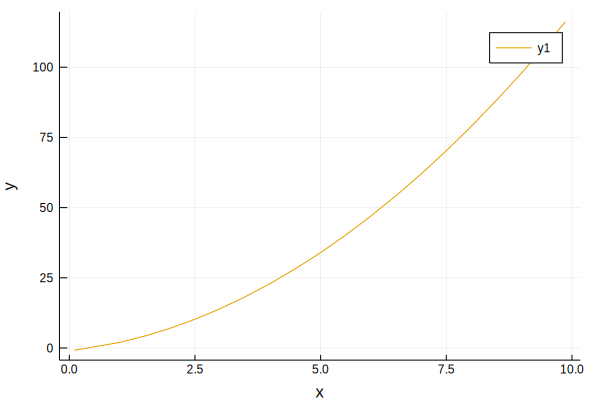

In [271]:
# Anonymous Functions
foo -> foo^2 + 2*foo + 1

#or

function (foo)
    foo^2 + 2*foo + 1
end

#using
plot(x -> x^2 + 2x - 1, 0, 10, xlabel="x", ylabel="y")

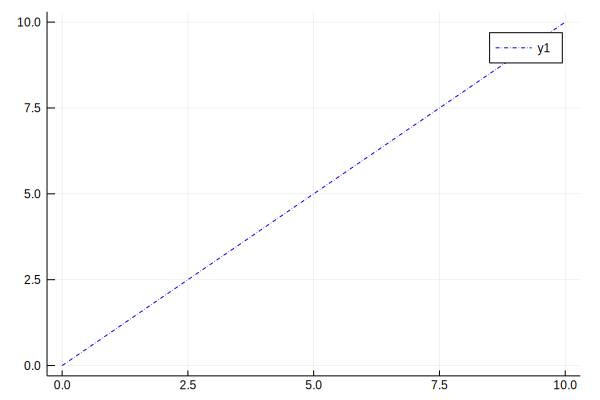

In [272]:
#kwargs
function myplot(x, y; style="solid", width=1, color="black")
    ###
    plot(x, y; style=Symbol(style), width=width, color=color)
end

# the ### indicates the function accepts keyword arguments
myplot(0:10, 0:10, style="dashdot", color="blue")

In [273]:
#closures
# allows capturing of variables defined outside scope
foo(x) = ()->x
fbar = foo(1)
fbar()

1

In [274]:
# let with block
# let will create new bindings, that are only valid for the
# scope of the block they run inside of

x, y, z = -1, -1, -1;
let x = 1, z='a'
    @show x y z;
end
# only y is from the original scope, both x and z are shadowed.
x,y,z

x = 1
y = -1
z = 'a'


(-1, -1, -1)

```Julia
function open(f::Function, args...)
    io = open(args...)
    try
        f(io)
    finally
        close(io)
    end
end


```

A `do` block can “capture” variables from its enclosing scope. For example, the variable `data` in the above example of `open…​do` is captured from the outer scope.

In [275]:
# ternary operators
# condition ? if true : if false
100 % 2 == 0 ? "even" : "odd"

"even"

In [276]:
# shortcut evaluation
# next arguments are only evaluated when it's needed
# so true && true, will stop at first true, since
# the second true is not needed.

function squeak(b::Bool)::Bool
    println("quack with $b")
    return b
end

println(squeak(10 > 0) || squeak(10 > 8))
println(squeak(10 < 0) && squeak(10 > 8))

quack with true
true
quack with false
false


In [277]:
# Tasks (CoRoutines)/(Yield)

# tasks in julia are control structures that can pass
# cooperatively without returning, tasks have channel
# objects as their first arguments, which can then be used
# pass values from the function to the callee

function fib(c::Channel)
    a = 0
    b = 1
    put!(c, a)
    while true
        put!(c, b)
        (a, b) = (b, a+b)
    end
end

fibgen = Channel(fib);
[take!(fibgen) for x in 1:10]

10-element Array{Int64,1}:
  0
  1
  1
  2
  3
  5
  8
 13
 21
 34

> The constructor `Channel` creates the task. The function `fib` is suspended after each call to `put!` and resumed after `take!`. For performance reasons, several values of the sequence are buffered in the channel object during a resume/suspend cycle.

>A channel object can also be used as an iterator

```julia
for val in Channel(fib)
    print(val, " ")
    val > 20 && break
end
```

**Conversion**

>Julia has a system for promoting arguments to a common type. This is not done automatically but can be easily extended.

Usage:
```Julia
convert(UInt8, x)
```
We can also add our own `convert` methods

```julia
Base.convert(::Type{Point{T}}, x::Array{T, 1}) where {T<:Real} = Point(x...)
#or
convert(Point{Int64}, [1, 2])
```

**Promotion** 

>it is the conversion of values of mixed types to a single common type

>Methods for the `promote` function are normally not directly defined, but the auxiliary function `promote_rule` is used to specify the rules for promotion

```julia
promote_rule(::Type{Float64}, ::Type{Int32}) = Float64
```

**MetaProgramming**

Programs in julia always start as strings

```julia
prog = "1 + 2"
```

Once defined these strings, are parsed into *expression* objects, represented in Julia by the `Type` `Expr` 

In [278]:
prog = "998 + 555"
ex = Meta.parse(prog)

:(998 + 555)

In [279]:
typeof(prog)

String

`dump` function displays expr objects with annotations

In [280]:
dump(ex)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 998
    3: Int64 555


They can also be constructed by prefixing with `:` inside `()` or by using a `quote` block

In [281]:
express = quote
    998+555
    end;
dump(express)

Expr
  head: Symbol block
  args: Array{Any}((2,))
    1: LineNumberNode
      line: Int64 2
      file: Symbol In[281]
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 998
        3: Int64 555


the expression can be evaluated by using `eval`:

> all modules have their own `eval` function that evaluates expression in its scope

> too many calls to evals, means something is not right !

In [282]:
eval(express)

1553

**Macros**

* A `macro` maps a tuple of `Expr` objects directly to a compiled expression
* Macros are called by prefixing their name with the `@` sign
* Macros can generate and include fragments of customized code during parse time, thus before the full program is run.

```
macro containervariable(container, element)
    return esc(:($(Symbol(container,element)) = 
    $container[$element]))
end
```
>This example illustrates how a macro can access the name of its arguments, something a function can’t do. The return expression needs to be “escaped” with esc because it has to be resolved in the macro call environment. 

The macro `@generated` creates specialized code for methods depending on the types of the arguments

```julia
@generated function square(x)
    println(x)
    :(x * x)
end
```

In [283]:
@generated function gensquare(x)
    Core.println(x)
    :(x * x)
end

gensquare (generic function with 1 method)

In [284]:
x = gensquare(2);
x

Int64


4

## Extras: Chapter Twenty : Base and Standard Library

* `@time` `macro` to time the runtimes of expression and functions
* `@profile` with `Profile.view()` to profile and see the results
* `@code_warntype` to check for type instabilities and type related warnings

Example: Interfaces

In [285]:
struct Fibonacci{T<:Real} end
Fibonacci(d::DataType) = d<:Real ? Fibonacci{d}() : error("No Real type!")

Base.iterate(::Fibonacci{T}) where {T<:Real} = (zero(T), (one(T), one(T)))
Base.iterate(::Fibonacci{T}, state::Tuple{T, T}) where {T<:Real} = (state[1], (state[2], state[1] + state[2]))

The above example implements a parametric type `Fibonacci` with no fields, and with an outer constructor and two separate `iterate` methods. 

The first `iterate` is used to initialize with a `Tuple(Zero{T}, State{T})` where the `State{T}` happens to be another tuple containing the second and third values, i.e. (1, 1).

The second `iterate` method then takes this `State` and returns the corresponding value for that `State` along with the next `State`, which is also a tuple with 2 following values.

This allows us to do things like use this Fibonacci type in loops.

```julia
for e in Fibonacci(Int64)
    e > 100 && break
    print(e, " ")
end
```

> Any time you are unsure about the flow of execution through your program, the simplest solution is to add print statements at the beginning of the relevant methods. If shuffle! prints a message that says something like Running shuffle! Deck, then as the program runs it traces the flow of execution.

> As better alternative, you can also use the `@which` macro

In [286]:
@which 2+2

+(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:53

In [287]:
using InteractiveUtils

function squaresum(a::Float64, b::Float64)
    a^2 + b^2
end

@code_lowered squaresum(3.0, 4.0)

CodeInfo(
│4 1 ─ %1 = (Core.apply_type)(Base.Val, 2)
│  │   %2 = (%1)()
│  │   %3 = (Base.literal_pow)(Main.:^, a, %2)
│  │   %4 = (Core.apply_type)(Base.Val, 2)
│  │   %5 = (%4)()
│  │   %6 = (Base.literal_pow)(Main.:^, b, %5)
│  │   %7 = %3 + %6
│  └──      return %7
)

>The `@code_lowered` macro returns an array of an **intermediate representation** of the code that is used by the compiler to generate optimised code. 

In [288]:
@code_typed squaresum(3.0, 4.0)

CodeInfo(
│╻╷ literal_pow4 1 ─ %1 = (Base.mul_float)(a, a)::Float64
││╻  *  │   %2 = (Base.mul_float)(b, b)::Float64
│╻  +  │   %3 = (Base.add_float)(%1, %2)::Float64
│    └──      return %3
) => Float64

>The `@code_typed` macro returns an array of an **intermediate representation** together with the type information.

In [289]:
@code_llvm squaresum(3.0, 4.0)


; Function squaresum
; Location: In[287]:4
define double @julia_squaresum_41436(double, double) {
top:
; Function literal_pow; {
; Location: intfuncs.jl:243
; Function *; {
; Location: float.jl:399
  %2 = fmul double %0, %0
  %3 = fmul double %1, %1
;}}
; Function +; {
; Location: float.jl:395
  %4 = fadd double %2, %3
;}
  ret double %4
}


>The `@code_llvm` macro uses the typed information from @code_typed and transforms it into LLVM code_llvm_llvm

In [290]:
@code_native squaresum(3.0, 4.0)

	.text
; Function squaresum {
; Location: In[287]:4
; Function literal_pow; {
; Location: intfuncs.jl:243
; Function *; {
; Location: In[287]:4
	vmulsd	%xmm0, %xmm0, %xmm0
	vmulsd	%xmm1, %xmm1, %xmm1
;}}
; Function +; {
; Location: float.jl:395
	vaddsd	%xmm1, %xmm0, %xmm0
;}
	retq
	nopl	(%rax)
;}


> @code_native is the final machine code generated

**Debugging**

`@warn "MSG"` and `@debug "MSG"`

In [291]:
@warn "Abandon printf debugging, all ye who enter here!"

┌ Warning: Abandon printf debugging, all ye who enter here!
└ @ Main In[291]:1


In [292]:
@debug "The sum of some values $(sum(rand(100)))"

`@warn` adds a default warning, whereas `@debug` will not output unless running with *debug logging enabled*

```console
$ JULIA_DEBUG=all julia -e '@debug "The sum of some values $(sum(rand(100)))"'
┌ Debug: The sum of some values 47.116520814555024
└ @ Main none:1
```